# (a) Consumption as a Fraction of GDP

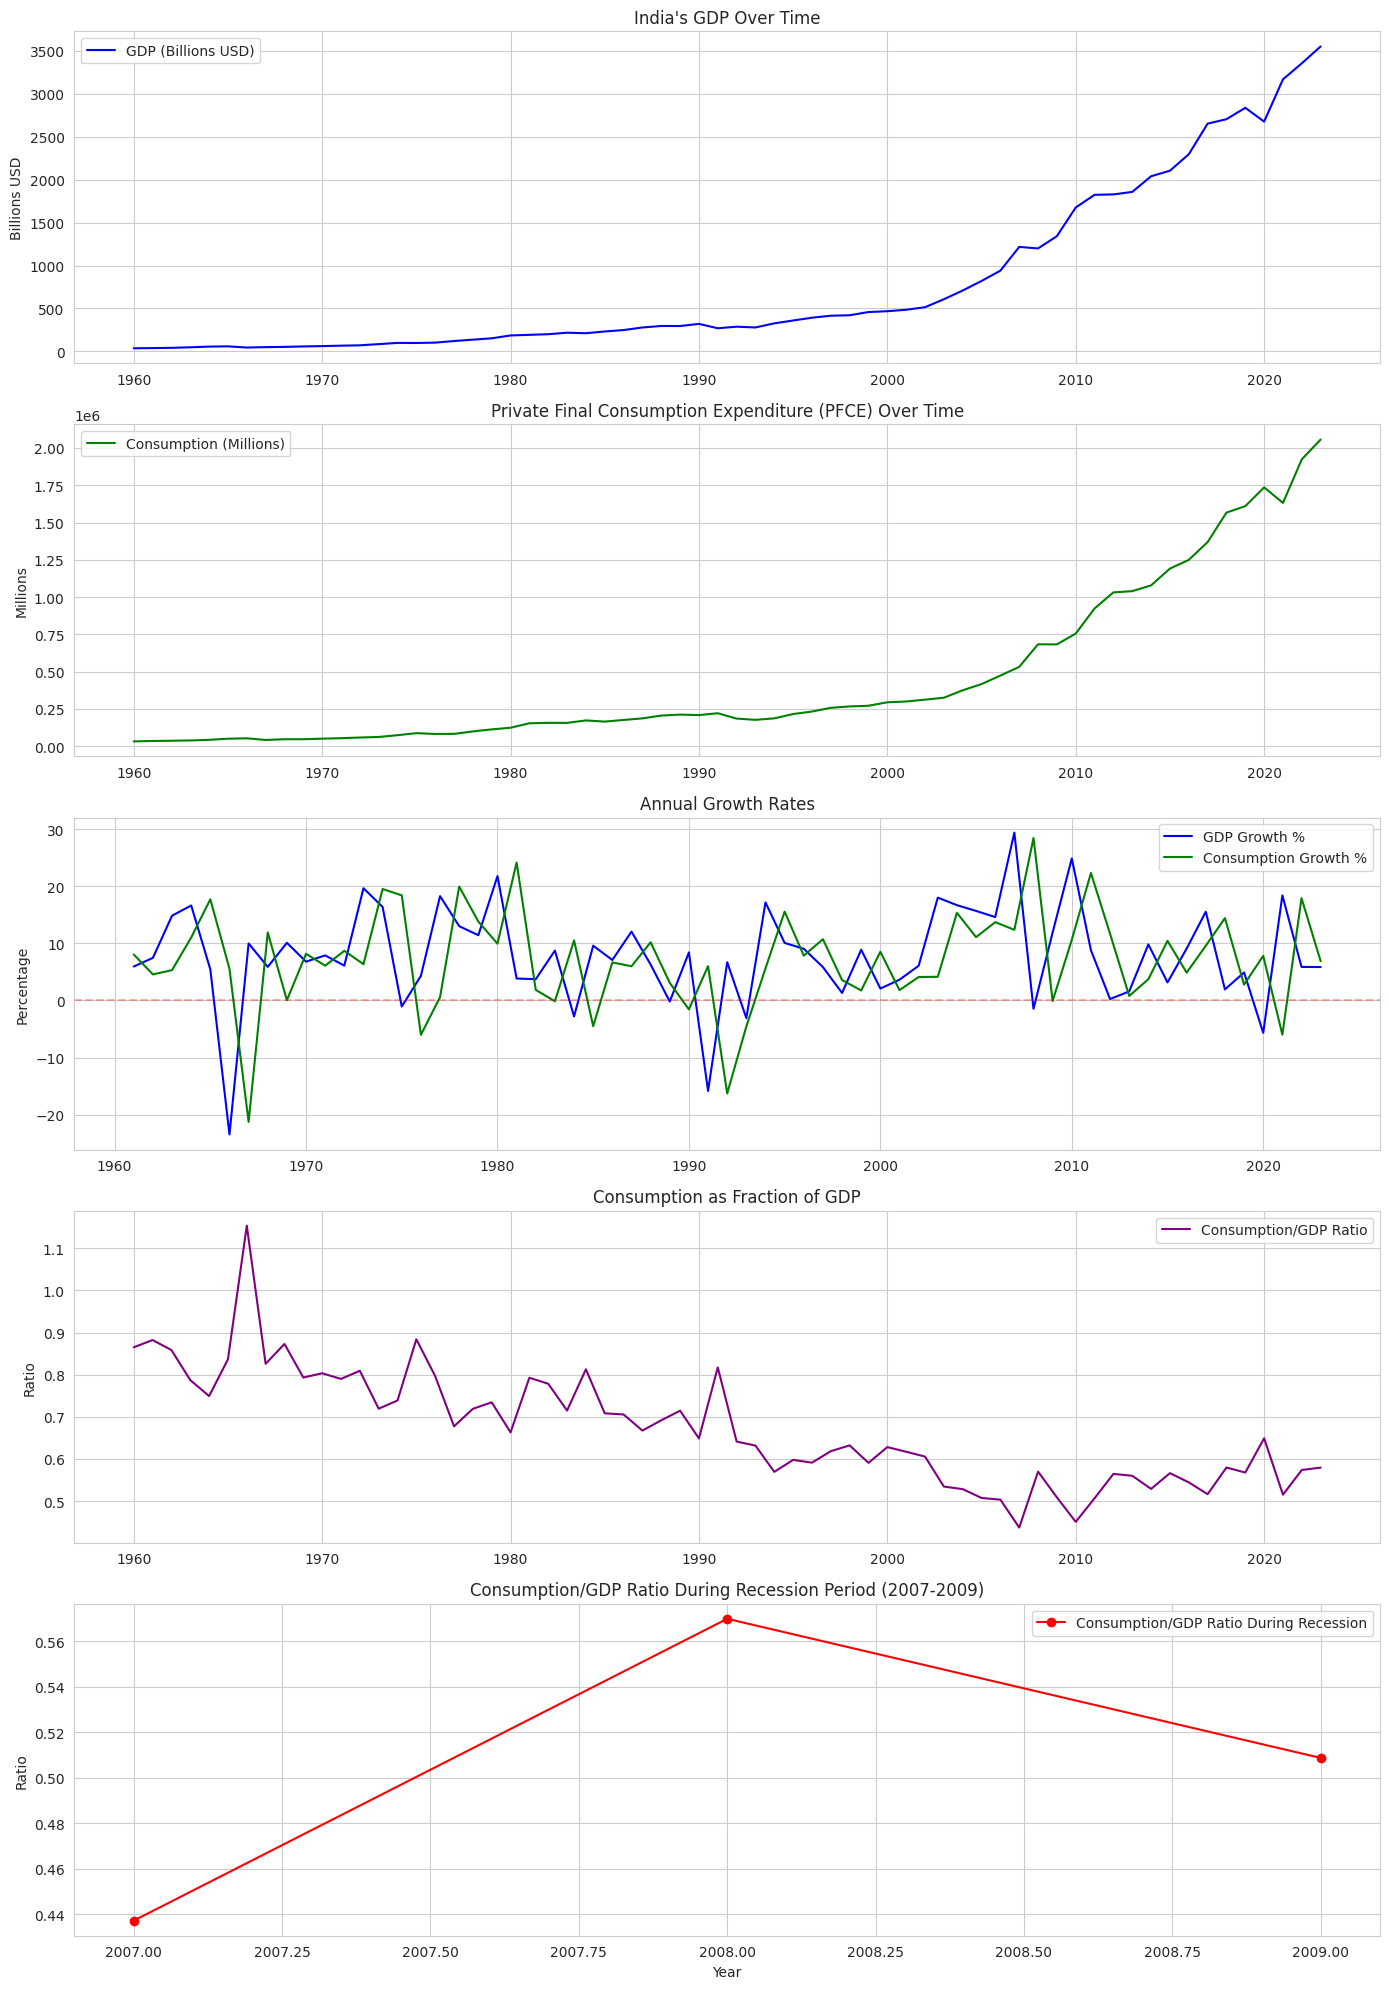

DESCRIPTIVE STATISTICS
               GDP   Consumption  Consumption_GDP_Ratio  GDP_Growth  \
count    64.000000  6.400000e+01              64.000000   63.000000   
mean    785.131884  4.477667e+05               0.672278    7.865641   
std     980.702082  5.407207e+05               0.134453    8.586475   
min      37.029884  3.203307e+04               0.437136  -23.465058   
25%     101.918988  8.217654e+04               0.568944    3.788902   
50%     296.315862  2.066915e+05               0.648787    7.465879   
75%    1203.355464  5.695615e+05               0.787887   12.543217   
max    3549.918919  2.056901e+06               1.153685   29.404269   

       Consumption_Growth  
count           63.000000  
mean             7.182444  
std              8.596011  
min            -21.264590  
25%              2.929970  
50%              6.891620  
75%             11.378671  
max             28.454516  

GREAT RECESSION PERIOD (2007-2009)
              GDP    Consumption  Consumption_GDP

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load the data
gdp_data = pd.read_excel("/content/India GDP.xlsx")
consumption_data = pd.read_excel("/content/PFCE India.xlsx")

# Clean and prepare the data
# For GDP data
gdp_data.columns = ["Date", "GDP"]
gdp_data["Date"] = pd.to_datetime(gdp_data["Date"]).dt.year
gdp_data = gdp_data.set_index("Date")

# For Consumption data
consumption_data.columns = ["Date", "Consumption"]
consumption_data["Date"] = pd.to_datetime(consumption_data["Date"]).dt.year
consumption_data = consumption_data.set_index("Date")

# Merge the datasets
merged_data = pd.merge(gdp_data, consumption_data, left_index=True, right_index=True, how="inner")
merged_data["Consumption_GDP_Ratio"] = merged_data["Consumption"] / (merged_data["GDP"] * 10**3)  # Convert GDP to same units (millions)

# Calculate growth rates
merged_data["GDP_Growth"] = merged_data["GDP"].pct_change() * 100
merged_data["Consumption_Growth"] = merged_data["Consumption"].pct_change() * 100

# Descriptive statistics
desc_stats = merged_data.describe()

# Time series decomposition for GDP
gdp_decomposition = seasonal_decompose(merged_data["GDP"], model='multiplicative', period=1)  # Annual data, no seasonality

# Time series decomposition for Consumption
consumption_decomposition = seasonal_decompose(merged_data["Consumption"], model='multiplicative', period=1)

# Great Recession period analysis
recession_years = [2007, 2008, 2009]
recession_data = merged_data.loc[recession_years]

# Plotting
fig, axes = plt.subplots(5, 1, figsize=(14, 20))

# GDP and Consumption trends
axes[0].plot(merged_data.index, merged_data["GDP"], label="GDP (Billions USD)", color="blue")
axes[0].set_title("India's GDP Over Time")
axes[0].set_ylabel("Billions USD")
axes[0].legend()

axes[1].plot(merged_data.index, merged_data["Consumption"], label="Consumption (Millions)", color="green")
axes[1].set_title("Private Final Consumption Expenditure (PFCE) Over Time")
axes[1].set_ylabel("Millions")
axes[1].legend()

# Growth rates
axes[2].plot(merged_data.index, merged_data["GDP_Growth"], label="GDP Growth %", color="blue")
axes[2].plot(merged_data.index, merged_data["Consumption_Growth"], label="Consumption Growth %", color="green")
axes[2].set_title("Annual Growth Rates")
axes[2].set_ylabel("Percentage")
axes[2].axhline(y=0, color='red', linestyle='--', alpha=0.3)
axes[2].legend()

# Consumption/GDP ratio
axes[3].plot(merged_data.index, merged_data["Consumption_GDP_Ratio"], label="Consumption/GDP Ratio", color="purple")
axes[3].set_title("Consumption as Fraction of GDP")
axes[3].set_ylabel("Ratio")
axes[3].legend()

# Recession period Consumption/GDP ratio
axes[4].plot(recession_data.index, recession_data["Consumption_GDP_Ratio"],
            label="Consumption/GDP Ratio During Recession",
            color="red",
            marker='o')
axes[4].set_title("Consumption/GDP Ratio During Recession Period (2007-2009)")
axes[4].set_ylabel("Ratio")
axes[4].set_xlabel("Year")
axes[4].legend()

plt.tight_layout()
plt.show()

# Print key statistics
print("="*50)
print("DESCRIPTIVE STATISTICS")
print("="*50)
print(desc_stats)

print("\n" + "="*50)
print("GREAT RECESSION PERIOD (2007-2009)")
print("="*50)
print(recession_data)

print("\n" + "="*50)
print("CONSUMPTION/GDP RATIO ANALYSIS")
print("="*50)
print(f"Average ratio: {merged_data['Consumption_GDP_Ratio'].mean():.4f}")
print(f"Minimum ratio: {merged_data['Consumption_GDP_Ratio'].min():.4f} in {merged_data['Consumption_GDP_Ratio'].idxmin()}")
print(f"Maximum ratio: {merged_data['Consumption_GDP_Ratio'].max():.4f} in {merged_data['Consumption_GDP_Ratio'].idxmax()}")
print("\nRecession period ratio details:")
print(f"2007: {recession_data.loc[2007, 'Consumption_GDP_Ratio']:.4f}")
print(f"2008: {recession_data.loc[2008, 'Consumption_GDP_Ratio']:.4f}")
print(f"2009: {recession_data.loc[2009, 'Consumption_GDP_Ratio']:.4f}")

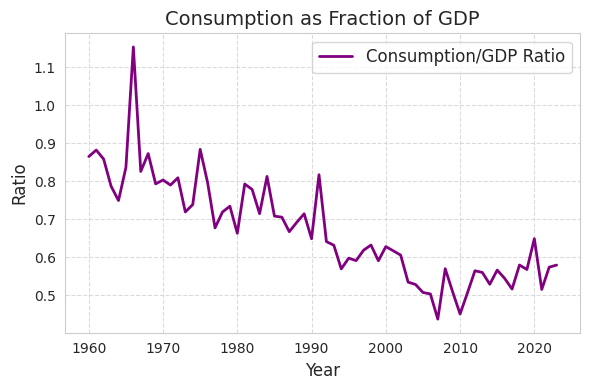

In [ ]:
# Consumption/GDP ratio
plt.figure(figsize=(6,4))
plt.plot(merged_data.index, merged_data["Consumption_GDP_Ratio"],
         label="Consumption/GDP Ratio",
         color="purple",
         linewidth=2)
plt.title("Consumption as Fraction of GDP", fontsize=14)
plt.ylabel("Ratio", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

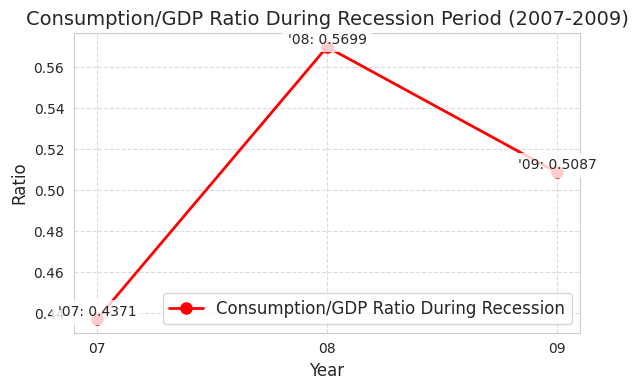

In [ ]:

plt.figure(figsize=(6, 4))

# Convert years to two-digit format
recession_years_short = [str(year)[-2:] for year in recession_data.index]

plt.plot(recession_data.index, recession_data["Consumption_GDP_Ratio"],
         label="Consumption/GDP Ratio During Recession",
         color="red",
         marker='o',
         linewidth=2,
         markersize=8)
plt.title("Consumption/GDP Ratio During Recession Period (2007-2009)", fontsize=14)
plt.ylabel("Ratio", fontsize=12)
plt.xlabel("Year", fontsize=12)

# Set x-ticks to show only last two digits of year
plt.xticks(recession_data.index, recession_years_short)

plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Add annotation for each data point (using two-digit years in labels)
for year, ratio in recession_data["Consumption_GDP_Ratio"].items():
    plt.text(year, ratio, f"'{str(year)[-2:]}: {ratio:.4f}",
             ha='center', va='bottom',
             fontsize=10,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.show()

# (b) Investment as a fraction of GDP

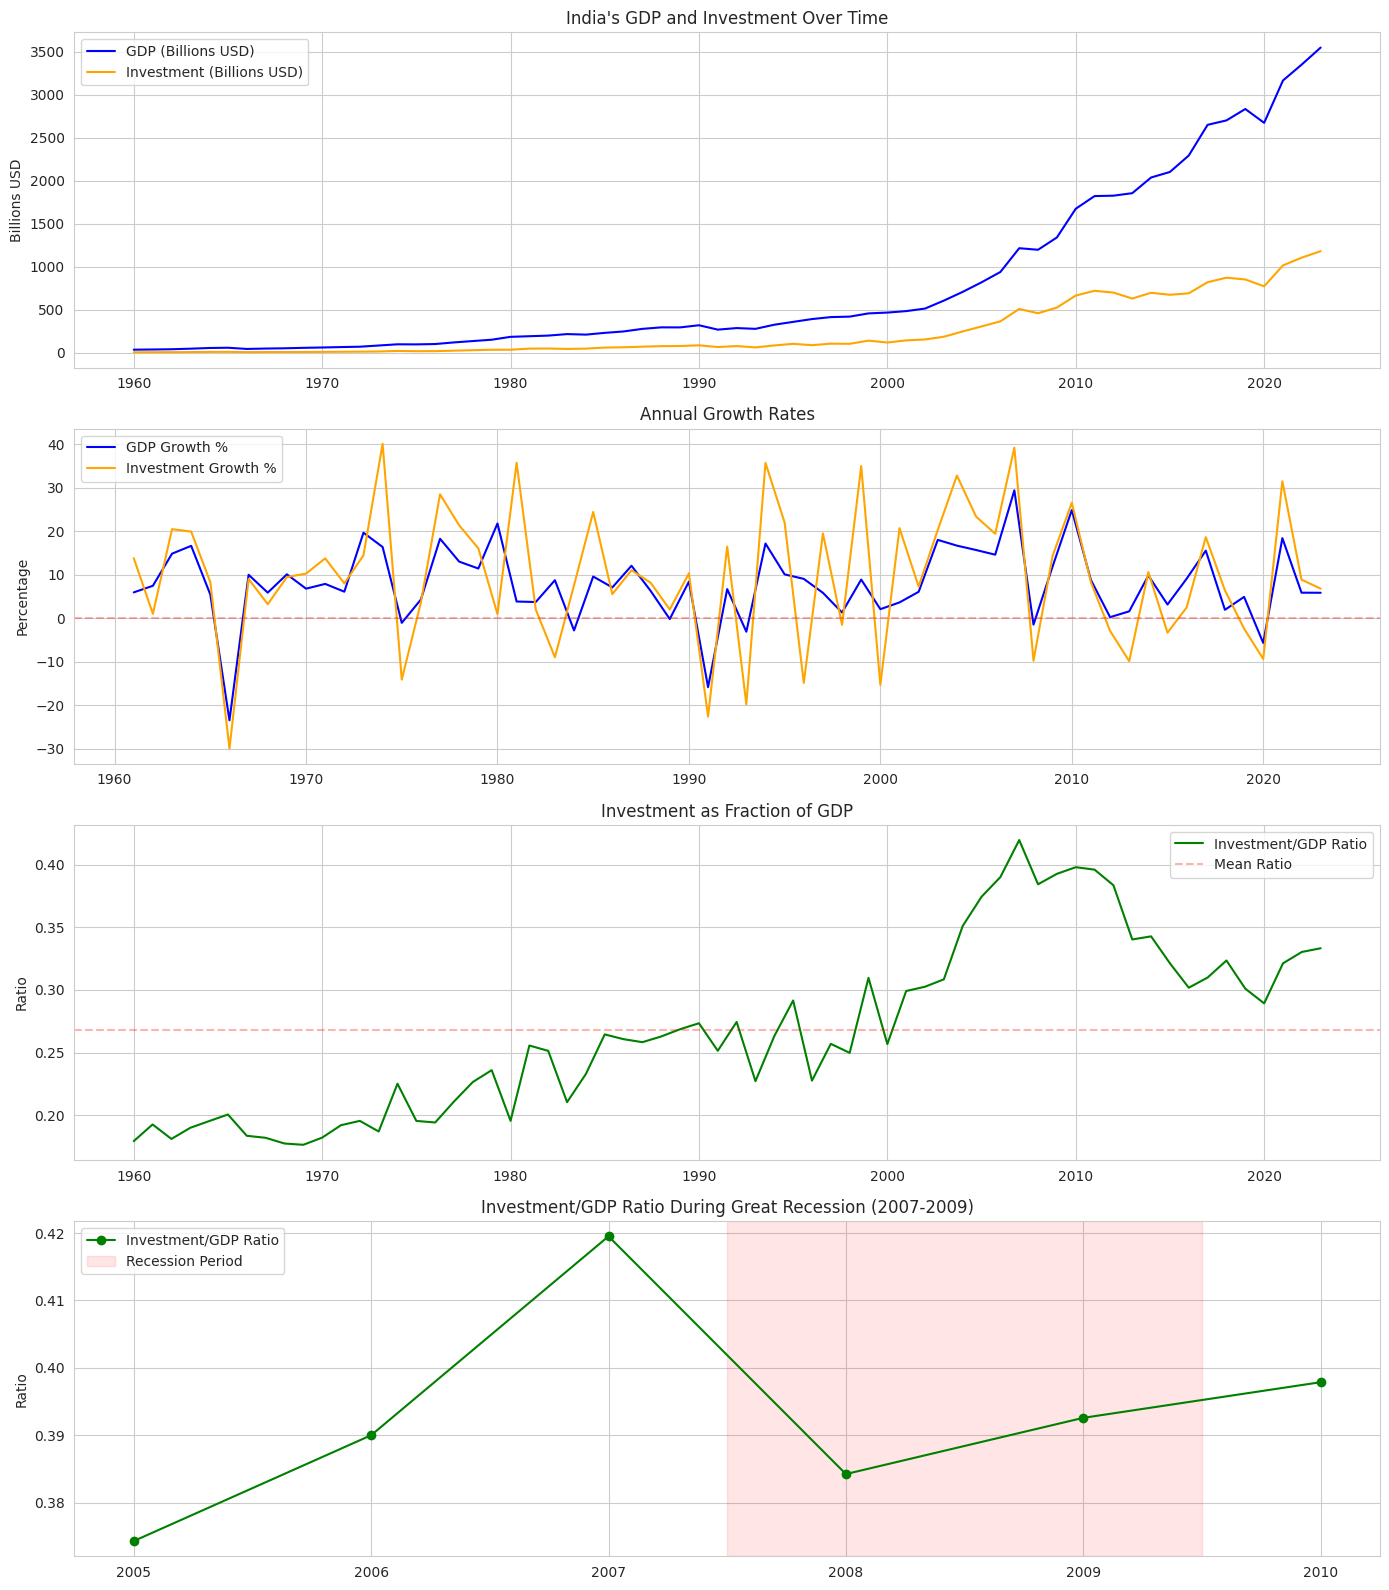

DESCRIPTIVE STATISTICS
               GDP   Investment  Investment_GDP_Ratio  GDP_Growth  \
count    64.000000    64.000000             64.000000   63.000000   
mean    785.131884   254.179245              0.268091    7.865641   
std     980.702082   329.521295              0.068553    8.586475   
min      37.029884     6.639953              0.176401  -23.465058   
25%     101.918988    21.790407              0.199317    3.788902   
50%     296.315862    79.302424              0.259464    7.465879   
75%    1203.355464   473.091053              0.312656   12.543217   
max    3549.918919  1182.828059              0.419508   29.404269   

       Investment_Growth  
count          63.000000  
mean            9.695711  
std            15.464310  
min           -29.948951  
25%             1.514670  
50%             9.028885  
75%            20.116399  
max            40.096999  

GREAT RECESSION PERIOD (2007-2009)
              GDP  Investment  Investment_GDP_Ratio
Date                    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load the data
gdp_data = pd.read_excel("/content/India GDP.xlsx")
investment_data = pd.read_excel("/content/Gross Capital Formation.xlsx")

# Clean and prepare the data
# For GDP data
gdp_data.columns = ["Date", "GDP"]
gdp_data["Date"] = pd.to_datetime(gdp_data["Date"]).dt.year
gdp_data = gdp_data.set_index("Date")

# For Investment data
investment_data.columns = ["Year", "Investment"]
investment_data = investment_data.set_index("Year")

# Merge the datasets
merged_data = pd.merge(gdp_data, investment_data, left_index=True, right_index=True, how="inner")
merged_data["Investment_GDP_Ratio"] = merged_data["Investment"] / merged_data["GDP"]

# Calculate growth rates
merged_data["GDP_Growth"] = merged_data["GDP"].pct_change() * 100
merged_data["Investment_Growth"] = merged_data["Investment"].pct_change() * 100

# Descriptive statistics
desc_stats = merged_data.describe()

# Time series decomposition for Investment
investment_decomposition = seasonal_decompose(merged_data["Investment"], model='multiplicative', period=1)

# Great Recession period analysis
recession_years = [2007, 2008, 2009]
recession_data = merged_data.loc[recession_years]

# Plotting
fig, axes = plt.subplots(4, 1, figsize=(14, 16))

# 1. GDP and Investment trends
axes[0].plot(merged_data.index, merged_data["GDP"], label="GDP (Billions USD)", color="blue")
axes[0].plot(merged_data.index, merged_data["Investment"], label="Investment (Billions USD)", color="orange")
axes[0].set_title("India's GDP and Investment Over Time")
axes[0].set_ylabel("Billions USD")
axes[0].legend()

# 2. Growth rates
axes[1].plot(merged_data.index, merged_data["GDP_Growth"], label="GDP Growth %", color="blue")
axes[1].plot(merged_data.index, merged_data["Investment_Growth"], label="Investment Growth %", color="orange")
axes[1].set_title("Annual Growth Rates")
axes[1].set_ylabel("Percentage")
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.3)
axes[1].legend()

# 3. Investment/GDP ratio
axes[2].plot(merged_data.index, merged_data["Investment_GDP_Ratio"], label="Investment/GDP Ratio", color="green")
axes[2].set_title("Investment as Fraction of GDP")
axes[2].set_ylabel("Ratio")
axes[2].axhline(y=merged_data["Investment_GDP_Ratio"].mean(), color='red', linestyle='--', alpha=0.3, label='Mean Ratio')
axes[2].legend()

# 4. Recession period zoom
recession_period = range(2005, 2011)
axes[3].plot(merged_data.loc[recession_period].index,
             merged_data.loc[recession_period]["Investment_GDP_Ratio"],
             'g-o', label="Investment/GDP Ratio")
axes[3].set_title("Investment/GDP Ratio During Great Recession (2007-2009)")
axes[3].set_ylabel("Ratio")
axes[3].axvspan(2007.5, 2009.5, color='red', alpha=0.1, label='Recession Period')
axes[3].legend()

plt.tight_layout()
plt.show()

# Print key statistics
print("="*50)
print("DESCRIPTIVE STATISTICS")
print("="*50)
print(desc_stats)

print("\n" + "="*50)
print("GREAT RECESSION PERIOD (2007-2009)")
print("="*50)
print(recession_data[["GDP", "Investment", "Investment_GDP_Ratio"]])

print("\n" + "="*50)
print("INVESTMENT/GDP RATIO ANALYSIS")
print("="*50)
print(f"Average ratio: {merged_data['Investment_GDP_Ratio'].mean():.4f}")
print(f"Minimum ratio: {merged_data['Investment_GDP_Ratio'].min():.4f} in {merged_data['Investment_GDP_Ratio'].idxmin()}")
print(f"Maximum ratio: {merged_data['Investment_GDP_Ratio'].max():.4f} in {merged_data['Investment_GDP_Ratio'].idxmax()}")
print(f"Ratio during Great Recession (2008): {merged_data.loc[2008]['Investment_GDP_Ratio']:.4f}")

# Calculate correlation between GDP growth and investment growth
correlation = merged_data["GDP_Growth"].corr(merged_data["Investment_Growth"])
print(f"\nCorrelation between GDP growth and Investment growth: {correlation:.4f}")

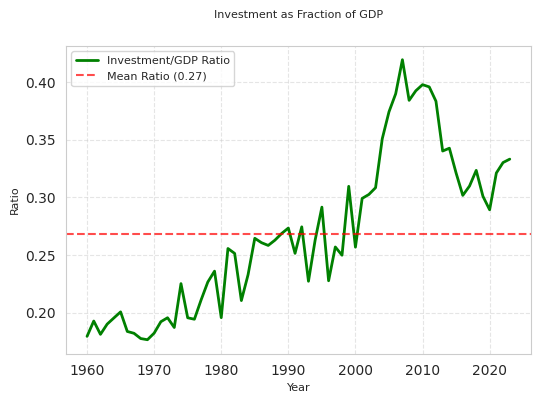

In [ ]:
plt.figure(figsize=(6, 4))

# Calculate mean ratio for reference line
mean_ratio = merged_data["Investment_GDP_Ratio"].mean()

# Plot the Investment/GDP ratio
plt.plot(merged_data.index, merged_data["Investment_GDP_Ratio"],
         label="Investment/GDP Ratio",
         color="green",
         linewidth=2)

# Add mean reference line
plt.axhline(y=mean_ratio, color='red', linestyle='--', alpha=0.7, label=f'Mean Ratio ({mean_ratio:.2f})')

# Formatting
plt.title("Investment as Fraction of GDP", fontsize=8, pad=20)
plt.ylabel("Ratio", fontsize=8)
plt.xlabel("Year", fontsize=8)
plt.legend(fontsize=8, loc='best')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

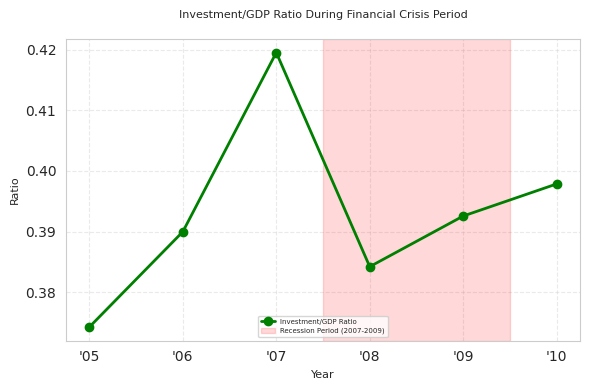

In [ ]:
plt.figure(figsize=(6, 4))

# Define recession period and data
recession_period = range(2005, 2011)
recession_data = merged_data.loc[recession_period]
investment_ratio = recession_data["Investment_GDP_Ratio"]

# Create two-digit year labels
year_labels = [f"'{str(year)[-2:]}" for year in recession_data.index]

# Plot the Investment/GDP ratio with markers
plt.plot(recession_data.index, investment_ratio,
         'g-o',
         linewidth=2,
         markersize=6,
         label="Investment/GDP Ratio")

# Highlight the recession period
plt.axvspan(2007.5, 2009.5, color='red', alpha=0.15, label='Recession Period (2007-2009)')

# Formatting
plt.title("Investment/GDP Ratio During Financial Crisis Period", fontsize=8, pad=15)
plt.ylabel("Ratio", fontsize=8)
plt.xlabel("Year", fontsize=8)
plt.legend(fontsize=5, loc='lower center')
plt.grid(True, linestyle='--', alpha=0.4)

# Set x-axis ticks to show two-digit years
plt.xticks(recession_data.index, year_labels)

plt.tight_layout()
plt.show()

# Government spending (all levels) as a fraction of GDP

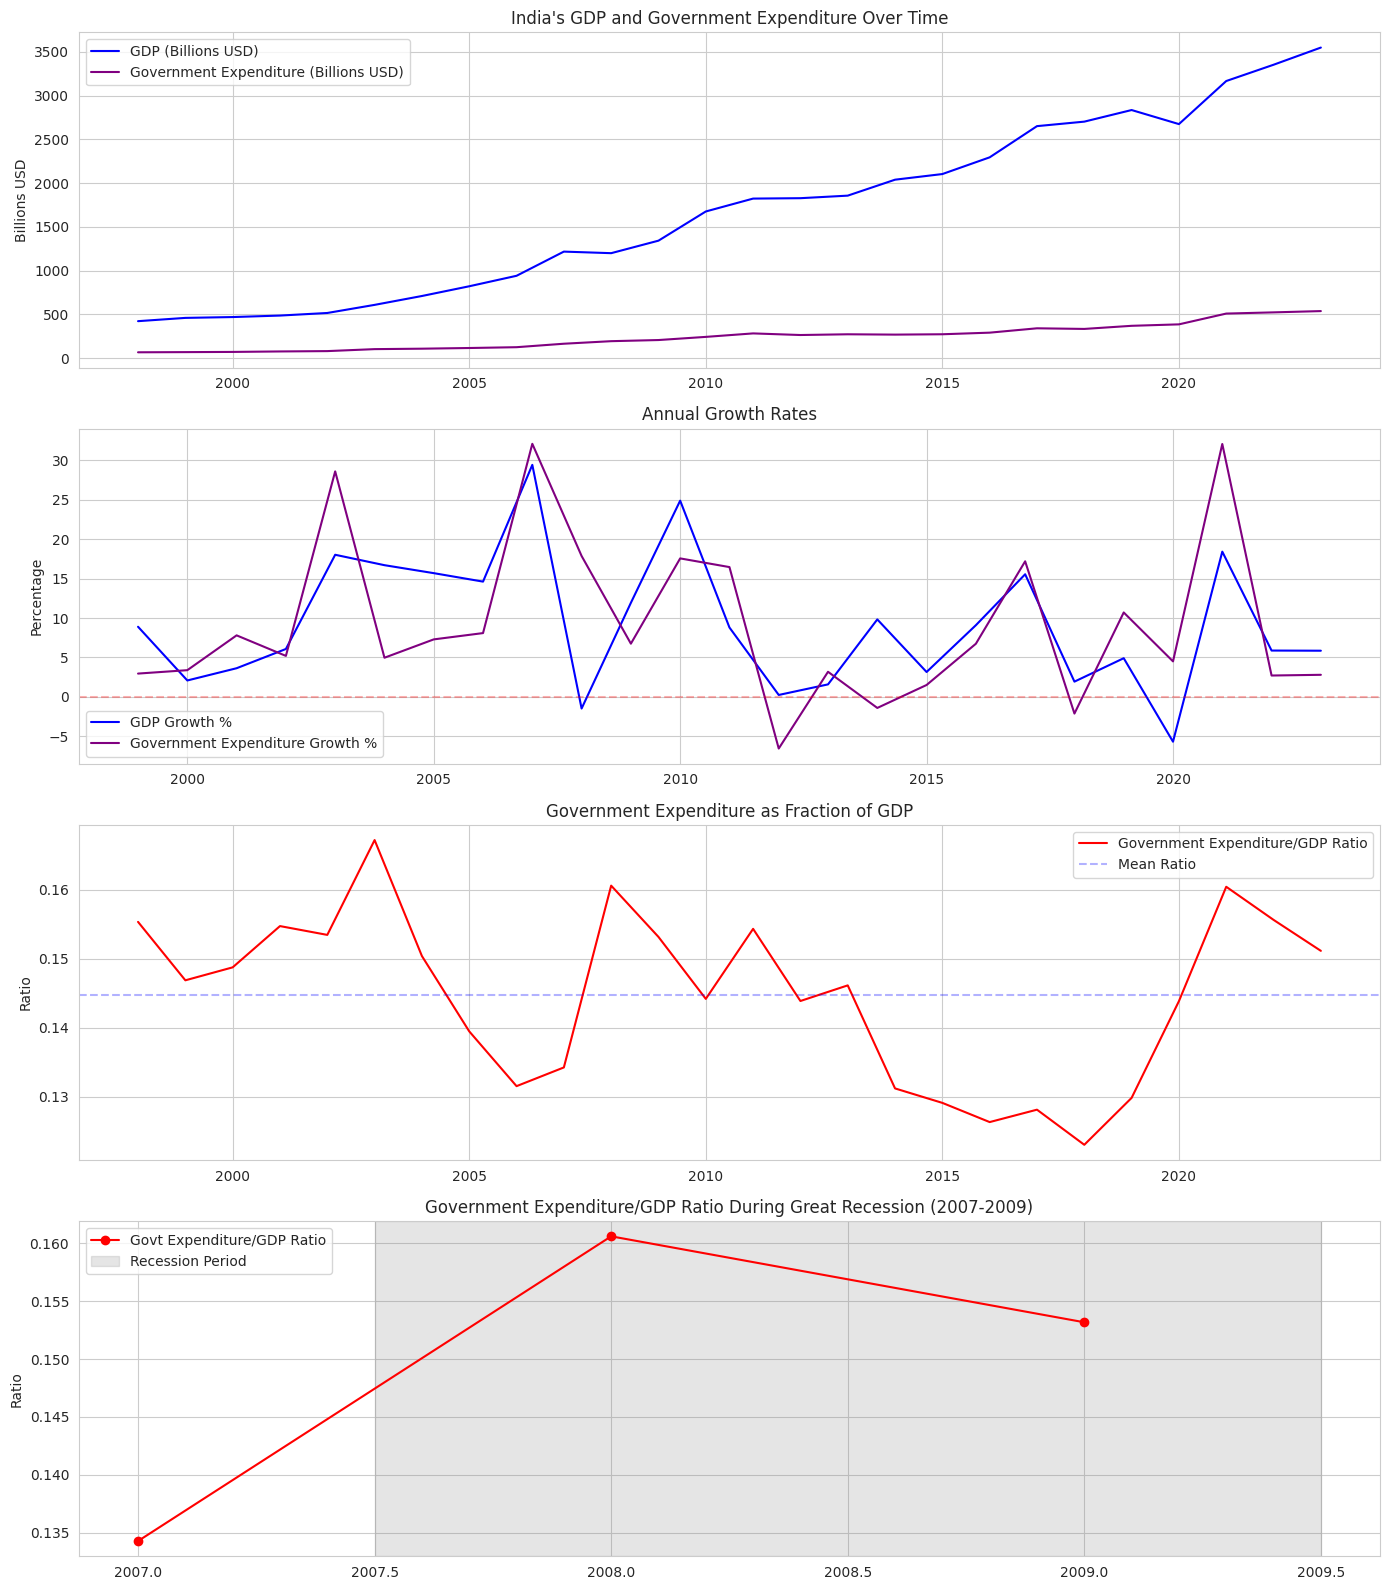

DESCRIPTIVE STATISTICS
               GDP  Expenditure  Govt_Exp_GDP_Ratio  GDP_Growth  \
count    26.000000    26.000000           26.000000   25.000000   
mean   1682.308607   240.138151            0.144754    9.200873   
std     997.012405   144.328326            0.012189    8.381490   
min     421.351317    65.461531            0.123069   -5.669147   
25%     736.960488   108.610745            0.132242    3.161250   
50%    1749.333675   252.317107            0.146530    8.798934   
75%    2562.304918   321.976873            0.154133   15.542874   
max    3549.918919   536.624309            0.167214   29.404269   

       Govt_Exp_Growth  
count        25.000000  
mean          9.213931  
std          10.200827  
min          -6.536783  
25%           2.960211  
50%           6.739869  
75%          16.453191  
max          32.070817  

GREAT RECESSION PERIOD (2007-2009)
              GDP  Expenditure  Govt_Exp_GDP_Ratio
Date                                              
2007  1216

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load the data
gdp_data = pd.read_excel("/content/India GDP.xlsx")
govt_exp_data = pd.read_excel("/content/Total Government expenditure.xlsx")

# Clean and prepare the data
# For GDP data
gdp_data.columns = ["Date", "GDP"]
gdp_data["Date"] = pd.to_datetime(gdp_data["Date"]).dt.year
gdp_data = gdp_data.set_index("Date")

# For Government Expenditure data
govt_exp_data.columns = ["Date", "Expenditure"]
govt_exp_data["Date"] = pd.to_datetime(govt_exp_data["Date"]).dt.year
govt_exp_data = govt_exp_data.set_index("Date")

# Convert expenditure from millions to billions for consistency
govt_exp_data["Expenditure"] = govt_exp_data["Expenditure"] / 1000

# Merge the datasets
merged_data = pd.merge(gdp_data, govt_exp_data, left_index=True, right_index=True, how="inner")
merged_data["Govt_Exp_GDP_Ratio"] = merged_data["Expenditure"] / merged_data["GDP"]

# Calculate growth rates
merged_data["GDP_Growth"] = merged_data["GDP"].pct_change() * 100
merged_data["Govt_Exp_Growth"] = merged_data["Expenditure"].pct_change() * 100

# Descriptive statistics
desc_stats = merged_data.describe()

# Time series decomposition for Government Expenditure
exp_decomposition = seasonal_decompose(merged_data["Expenditure"], model='multiplicative', period=1)

# Great Recession period analysis
recession_years = [2007, 2008, 2009]
recession_data = merged_data.loc[recession_years]

# Plotting
fig, axes = plt.subplots(4, 1, figsize=(14, 16))

# 1. GDP and Government Expenditure trends
axes[0].plot(merged_data.index, merged_data["GDP"], label="GDP (Billions USD)", color="blue")
axes[0].plot(merged_data.index, merged_data["Expenditure"], label="Government Expenditure (Billions USD)", color="purple")
axes[0].set_title("India's GDP and Government Expenditure Over Time")
axes[0].set_ylabel("Billions USD")
axes[0].legend()

# 2. Growth rates
axes[1].plot(merged_data.index, merged_data["GDP_Growth"], label="GDP Growth %", color="blue")
axes[1].plot(merged_data.index, merged_data["Govt_Exp_Growth"], label="Government Expenditure Growth %", color="purple")
axes[1].set_title("Annual Growth Rates")
axes[1].set_ylabel("Percentage")
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.3)
axes[1].legend()

# 3. Government Expenditure/GDP ratio
axes[2].plot(merged_data.index, merged_data["Govt_Exp_GDP_Ratio"], label="Government Expenditure/GDP Ratio", color="red")
axes[2].set_title("Government Expenditure as Fraction of GDP")
axes[2].set_ylabel("Ratio")
axes[2].axhline(y=merged_data["Govt_Exp_GDP_Ratio"].mean(), color='blue', linestyle='--', alpha=0.3, label='Mean Ratio')
axes[2].legend()

# 4. Recession period zoom
recession_period = range(2007, 2010)
axes[3].plot(merged_data.loc[recession_period].index,
             merged_data.loc[recession_period]["Govt_Exp_GDP_Ratio"],
             'r-o', label="Govt Expenditure/GDP Ratio")
axes[3].set_title("Government Expenditure/GDP Ratio During Great Recession (2007-2009)")
axes[3].set_ylabel("Ratio")
axes[3].axvspan(2007.5, 2009.5, color='gray', alpha=0.2, label='Recession Period')
axes[3].legend()

plt.tight_layout()
plt.show()

# Print key statistics
print("="*50)
print("DESCRIPTIVE STATISTICS")
print("="*50)
print(desc_stats)

print("\n" + "="*50)
print("GREAT RECESSION PERIOD (2007-2009)")
print("="*50)
print(recession_data[["GDP", "Expenditure", "Govt_Exp_GDP_Ratio"]])

print("\n" + "="*50)
print("GOVERNMENT EXPENDITURE/GDP RATIO ANALYSIS")
print("="*50)
print(f"Average ratio: {merged_data['Govt_Exp_GDP_Ratio'].mean():.4f}")
print(f"Minimum ratio: {merged_data['Govt_Exp_GDP_Ratio'].min():.4f} in {merged_data['Govt_Exp_GDP_Ratio'].idxmin()}")
print(f"Maximum ratio: {merged_data['Govt_Exp_GDP_Ratio'].max():.4f} in {merged_data['Govt_Exp_GDP_Ratio'].idxmax()}")
print(f"Ratio during Great Recession (2008): {merged_data.loc[2008]['Govt_Exp_GDP_Ratio']:.4f}")

# Calculate correlation between GDP growth and government expenditure growth
correlation = merged_data["GDP_Growth"].corr(merged_data["Govt_Exp_Growth"])
print(f"\nCorrelation between GDP growth and Government Expenditure growth: {correlation:.4f}")

# COVID period analysis
covid_data = merged_data.loc[2019:2021]
print("\n" + "="*50)
print("COVID PERIOD ANALYSIS (2019-2021)")
print("="*50)
print(covid_data[["GDP", "Expenditure", "Govt_Exp_GDP_Ratio"]])

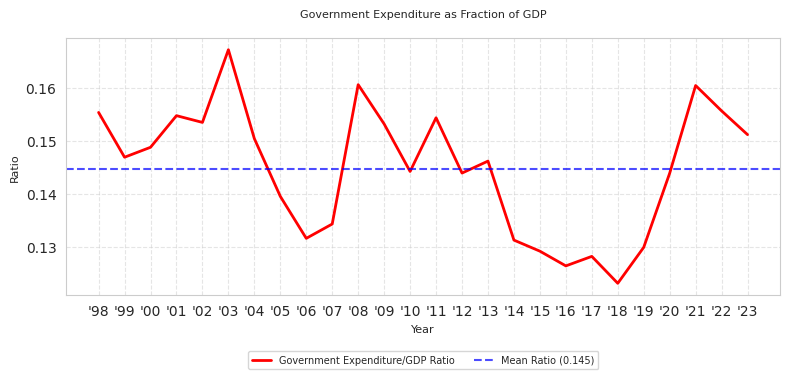

In [ ]:
plt.figure(figsize=(8, 4))

# Calculate mean ratio
mean_ratio = merged_data["Govt_Exp_GDP_Ratio"].mean()

# Create two-digit year labels
year_labels = [f"'{str(year)[-2:]}" for year in merged_data.index]

# Plot the ratio
plt.plot(merged_data.index, merged_data["Govt_Exp_GDP_Ratio"],
         label="Government Expenditure/GDP Ratio",
         color="red",
         linewidth=2)

# Add mean reference line
plt.axhline(y=mean_ratio, color='blue', linestyle='--', alpha=0.7,
            label=f'Mean Ratio ({mean_ratio:.3f})')


# Formatting
plt.title("Government Expenditure as Fraction of GDP", fontsize=8, pad=15)
plt.ylabel("Ratio", fontsize=8)
plt.xlabel("Year", fontsize=8)
plt.legend(fontsize=7, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.grid(True, linestyle='--', alpha=0.5)

# Set two-digit years on x-axis
plt.xticks(merged_data.index, year_labels)

plt.tight_layout()
plt.show()

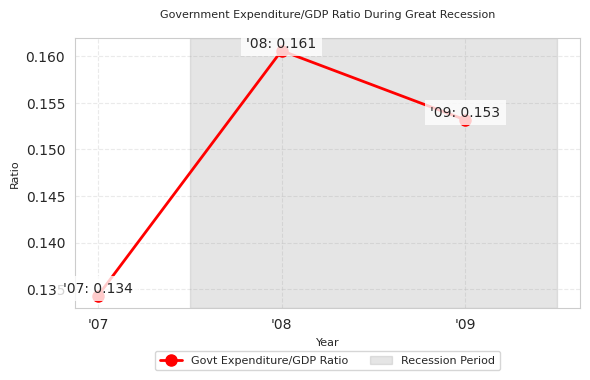

In [ ]:
plt.figure(figsize=(6, 4))

# Define recession period and data
recession_period = range(2007, 2010)
recession_data = merged_data.loc[recession_period]
govt_ratio = recession_data["Govt_Exp_GDP_Ratio"]

# Create two-digit year labels
year_labels = [f"'{str(year)[-2:]}" for year in recession_data.index]

# Plot with markers
plt.plot(recession_data.index, govt_ratio,
         'r-o',
         linewidth=2,
         markersize=8,
         label="Govt Expenditure/GDP Ratio")

# Highlight recession period
plt.axvspan(2007.5, 2009.5, color='gray', alpha=0.2, label='Recession Period')

# Add data labels
for year in recession_data.index:
    ratio = govt_ratio.loc[year]
    plt.text(year, ratio, f"'{str(year)[-2:]}: {ratio:.3f}",
             ha='center', va='bottom',
             fontsize=10,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Formatting
plt.title("Government Expenditure/GDP Ratio During Great Recession", fontsize=8, pad=15)
plt.ylabel("Ratio", fontsize=8)
plt.xlabel("Year", fontsize=8)
plt.legend(fontsize=8, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)
plt.grid(True, linestyle='--', alpha=0.4)

# Set two-digit years on x-axis
plt.xticks(recession_data.index, year_labels)

plt.tight_layout()
plt.show()

# (d) Payments to labor as a share of GDP

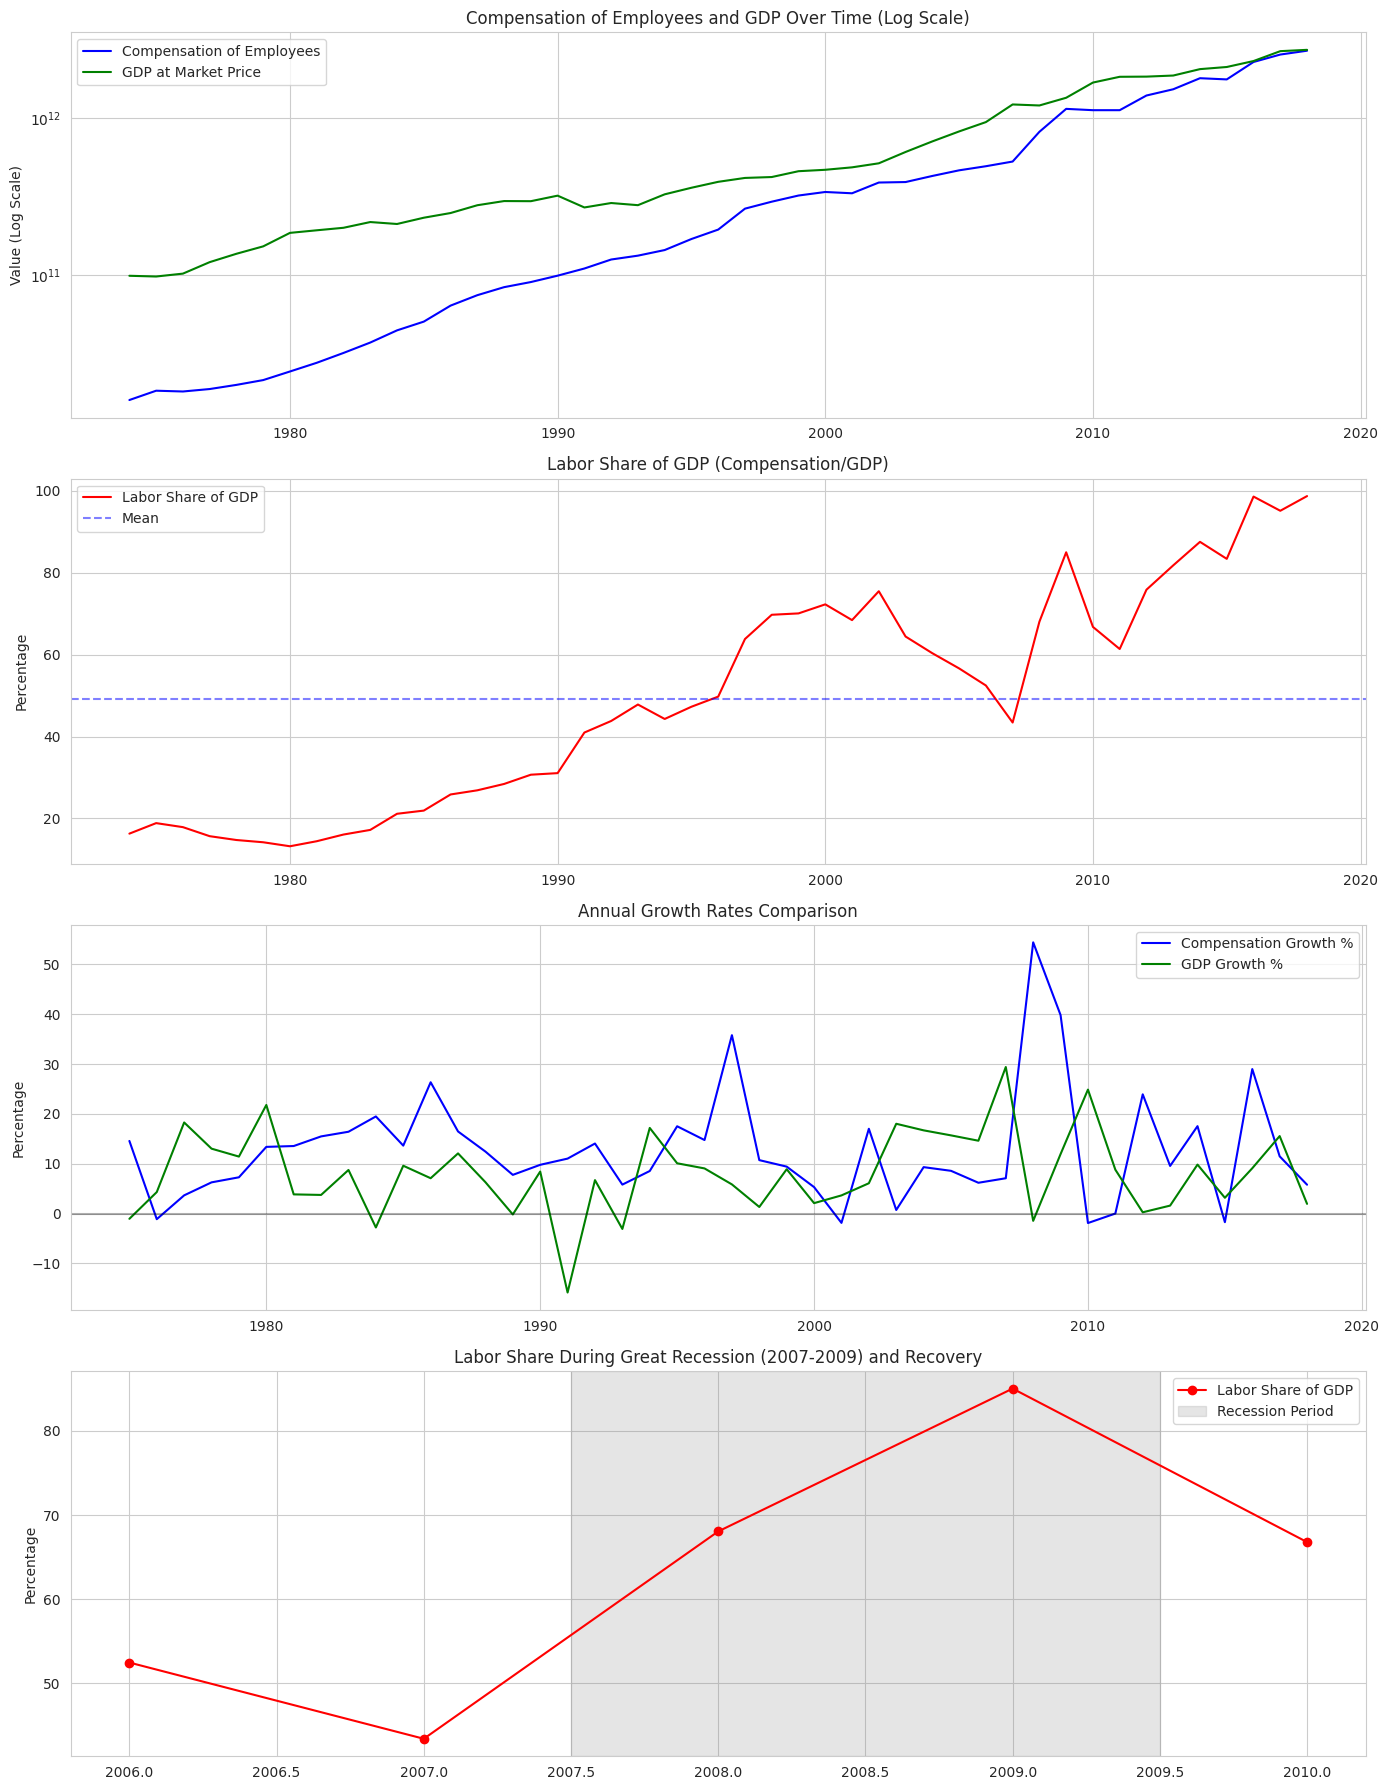

DESCRIPTIVE STATISTICS
       Compensation           GDP  Labor_Share  Compensation_Growth  \
count  4.500000e+01  4.500000e+01    45.000000            44.000000   
mean   5.327046e+11  7.531208e+11    49.289350            12.797534   
std    7.183885e+11  7.597810e+11    26.806221            11.165356   
min    1.620000e+10  9.847383e+10    13.191750            -1.907300   
25%    5.094000e+10  2.325116e+11    21.908589             6.236336   
50%    1.954900e+11  3.928969e+11    47.823874            10.870157   
75%    5.283700e+11  1.198895e+12    69.754143            16.427424   
max    2.669180e+12  2.702930e+12    98.751368            54.422091   

       GDP_Growth  Labor_Share_Change  
count   44.000000           44.000000  
mean     8.100871            1.874416  
std      8.228021            7.500494  
min    -15.849535          -18.231916  
25%      2.892626           -2.523776  
50%      8.582719            1.392440  
75%     12.305601            3.960738  
max     29.404269

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load the data
comp_data = pd.read_excel("Compensation Of Employees.xlsx")
gdp_data = pd.read_excel("GDP at Market Price.xlsx")

# Clean and prepare the data
comp_data.columns = ["Year", "Compensation"]
comp_data = comp_data.dropna()  # Remove empty rows
comp_data = comp_data.set_index("Year")

gdp_data.columns = ["Year", "GDP"]
gdp_data = gdp_data.set_index("Year")

# Merge the datasets
merged_data = pd.merge(comp_data, gdp_data, left_index=True, right_index=True, how="inner")

# Calculate Labor Share of GDP
merged_data["Labor_Share"] = (merged_data["Compensation"] / merged_data["GDP"]) * 100

# Calculate growth rates
merged_data["Compensation_Growth"] = merged_data["Compensation"].pct_change() * 100
merged_data["GDP_Growth"] = merged_data["GDP"].pct_change() * 100
merged_data["Labor_Share_Change"] = merged_data["Labor_Share"].diff()

# Descriptive statistics
desc_stats = merged_data.describe()

# Time series decomposition for Labor Share
decomposition = seasonal_decompose(merged_data["Labor_Share"], model='additive', period=1)

# Great Recession period analysis
recession_years = [2007, 2008, 2009]
recession_data = merged_data.loc[recession_years]

# Plotting
fig, axes = plt.subplots(4, 1, figsize=(14, 18))

# 1. Compensation and GDP trends (log scale for better visualization)
axes[0].plot(merged_data.index, merged_data["Compensation"], label="Compensation of Employees", color="blue")
axes[0].plot(merged_data.index, merged_data["GDP"], label="GDP at Market Price", color="green")
axes[0].set_title("Compensation of Employees and GDP Over Time (Log Scale)")
axes[0].set_ylabel("Value (Log Scale)")
axes[0].set_yscale("log")
axes[0].legend()

# 2. Labor Share of GDP
axes[1].plot(merged_data.index, merged_data["Labor_Share"], label="Labor Share of GDP", color="red")
axes[1].set_title("Labor Share of GDP (Compensation/GDP)")
axes[1].set_ylabel("Percentage")
axes[1].axhline(y=merged_data["Labor_Share"].mean(), color='blue', linestyle='--', alpha=0.5, label='Mean')
axes[1].legend()

# 3. Growth rates comparison
axes[2].plot(merged_data.index, merged_data["Compensation_Growth"], label="Compensation Growth %", color="blue")
axes[2].plot(merged_data.index, merged_data["GDP_Growth"], label="GDP Growth %", color="green")
axes[2].set_title("Annual Growth Rates Comparison")
axes[2].set_ylabel("Percentage")
axes[2].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[2].legend()

# 4. Recession period zoom
recession_period = range(2006, 2011)  # Showing a few years before and after for context
axes[3].plot(merged_data.loc[recession_period].index,
             merged_data.loc[recession_period]["Labor_Share"],
             'r-o', label="Labor Share of GDP")
axes[3].set_title("Labor Share During Great Recession (2007-2009) and Recovery")
axes[3].set_ylabel("Percentage")
axes[3].axvspan(2007.5, 2009.5, color='gray', alpha=0.2, label='Recession Period')
axes[3].legend()

plt.tight_layout()
plt.show()

# Print key statistics
print("="*50)
print("DESCRIPTIVE STATISTICS")
print("="*50)
print(desc_stats)

print("\n" + "="*50)
print("GREAT RECESSION PERIOD (2007-2009)")
print("="*50)
print(recession_data[["Compensation", "GDP", "Labor_Share"]])

print("\n" + "="*50)
print("LABOR SHARE ANALYSIS")
print("="*50)
print(f"Average labor share: {merged_data['Labor_Share'].mean():.2f}%")
print(f"Minimum labor share: {merged_data['Labor_Share'].min():.2f}% in {merged_data['Labor_Share'].idxmin()}")
print(f"Maximum labor share: {merged_data['Labor_Share'].max():.2f}% in {merged_data['Labor_Share'].idxmax()}")
print(f"Labor share at start of Great Recession (2007): {merged_data.loc[2007]['Labor_Share']:.2f}%")
print(f"Labor share at end of Great Recession (2009): {merged_data.loc[2009]['Labor_Share']:.2f}%")
print(f"Change during recession: {merged_data.loc[2009]['Labor_Share'] - merged_data.loc[2007]['Labor_Share']:.2f} percentage points")

# Calculate correlation between Compensation growth and GDP growth
correlation = merged_data["Compensation_Growth"].corr(merged_data["GDP_Growth"])
print(f"\nCorrelation between Compensation growth and GDP growth: {correlation:.4f}")

# COVID period analysis (if data includes those years)
if 2020 in merged_data.index:
    covid_data = merged_data.loc[2019:2021]
    print("\n" + "="*50)
    print("COVID PERIOD ANALYSIS (2019-2021)")
    print("="*50)
    print(covid_data[["Compensation", "GDP", "Labor_Share"]])

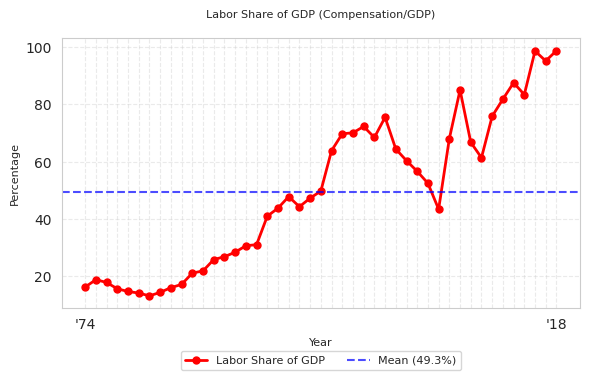

In [ ]:
plt.figure(figsize=(6, 4))

# Calculate mean labor share
mean_share = merged_data["Labor_Share"].mean()

# Create x-tick labels (only show first and last year)
years = merged_data.index
xtick_labels = [f"'{str(years[0])[-2:]}" if i == 0 else
               f"'{str(years[-1])[-2:]}" if i == len(years)-1 else
               "" for i in range(len(years))]

plt.plot(merged_data.index, merged_data["Labor_Share"],
         color="red",
         linewidth=2,
         marker='o',
         markersize=5,
         label="Labor Share of GDP")

plt.axhline(y=mean_share, color='blue', linestyle='--', linewidth=1.5, alpha=0.7,
            label=f'Mean ({mean_share:.1f}%)')

# Formatting
plt.title("Labor Share of GDP (Compensation/GDP)", fontsize=8, pad=15)
plt.ylabel("Percentage", fontsize=8)
plt.xlabel("Year", fontsize=8)
plt.xticks(years, xtick_labels)  # Only show first and last year
plt.grid(True, linestyle='--', alpha=0.4)

plt.legend(fontsize=8, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)
plt.tight_layout()
plt.show()

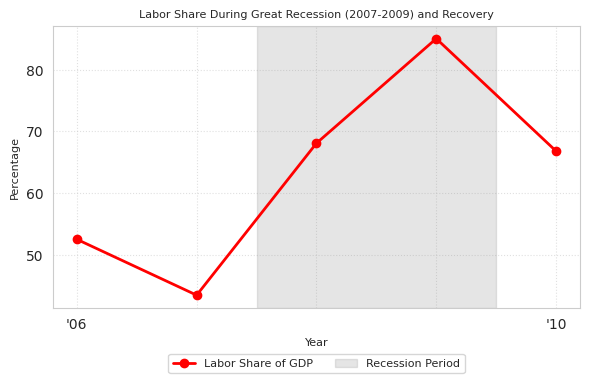

In [ ]:
plt.figure(figsize=(6, 4))

# Define recession period and data
recession_period = range(2006, 2011)
recession_data = merged_data.loc[recession_period]
labor_share = recession_data["Labor_Share"]

# Create x-tick labels (only show first and last year)
years = recession_data.index
xtick_labels = [f"'{years[0] % 100:02d}" if i == 0 else
               f"'{years[-1] % 100:02d}" if i == len(years)-1 else
               "" for i in range(len(years))]

# Plot with markers
plt.plot(recession_data.index, labor_share,
         'r-o',
         linewidth=2,
         markersize=6,
         label="Labor Share of GDP")

# Highlight recession period
plt.axvspan(2007.5, 2009.5, color='gray', alpha=0.2, label='Recession Period')

# Formatting
plt.title("Labor Share During Great Recession (2007-2009) and Recovery", fontsize=8)
plt.ylabel("Percentage", fontsize=8)
plt.xlabel("Year", fontsize=8)
plt.xticks(years, xtick_labels)  # Only show first and last year
plt.grid(True, linestyle=':', alpha=0.6)

# Position legend at lower center
plt.legend(fontsize=8, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)

plt.tight_layout()
plt.show()

# (e) Payments to capital as a share of GDP

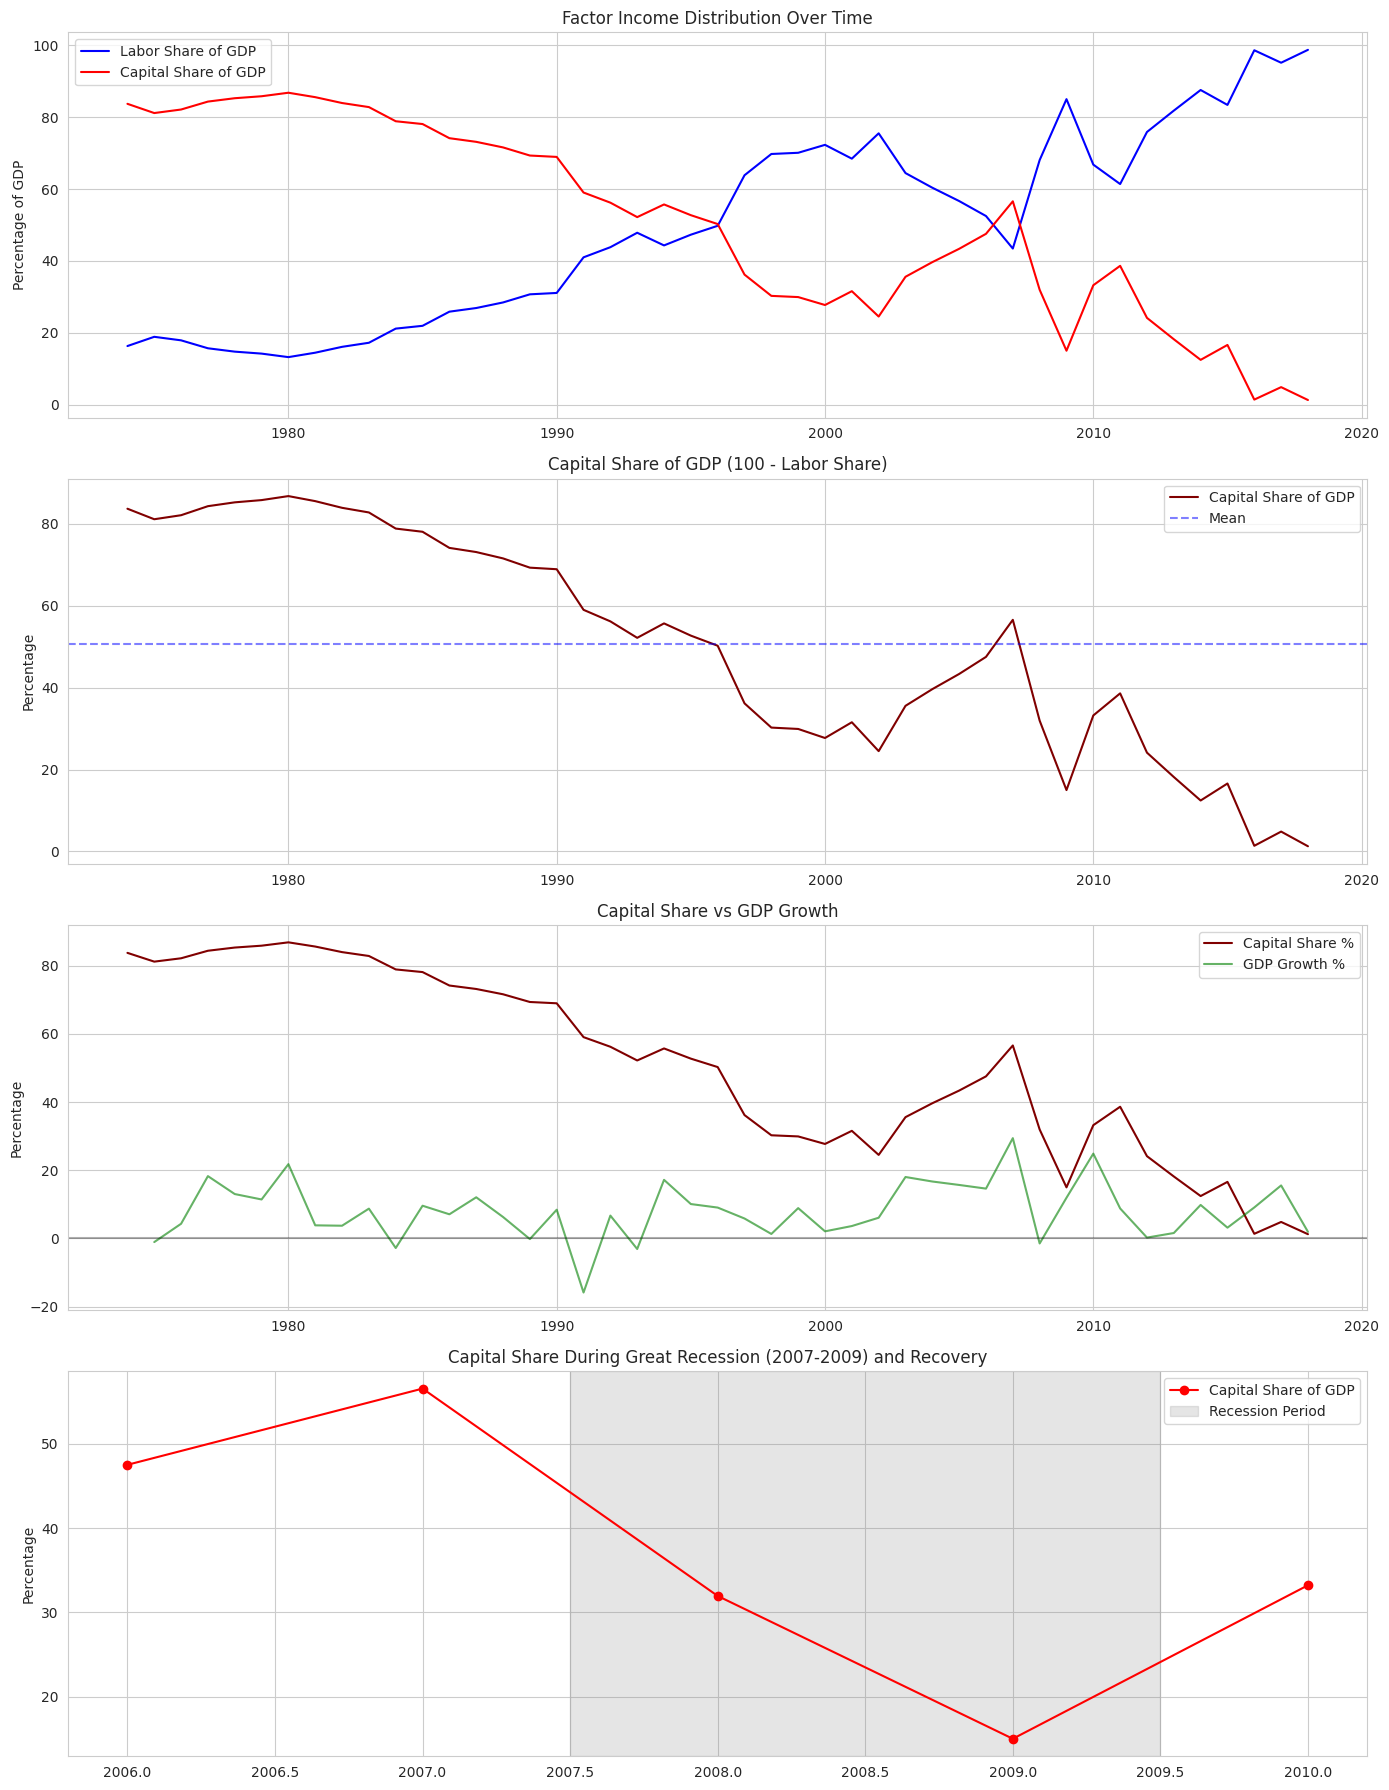

DESCRIPTIVE STATISTICS
       Compensation           GDP  Labor_Share  Capital_Share  \
count  4.500000e+01  4.500000e+01    45.000000      45.000000   
mean   5.327046e+11  7.531208e+11    49.289350      50.710650   
std    7.183885e+11  7.597810e+11    26.806221      26.806221   
min    1.620000e+10  9.847383e+10    13.191750       1.248632   
25%    5.094000e+10  2.325116e+11    21.908589      30.245857   
50%    1.954900e+11  3.928969e+11    47.823874      52.176126   
75%    5.283700e+11  1.198895e+12    69.754143      78.091411   
max    2.669180e+12  2.702930e+12    98.751368      86.808250   

       Capital_Share_Change  GDP_Growth  
count             44.000000   44.000000  
mean              -1.874416    8.100871  
std                7.500494    8.228021  
min              -24.630813  -15.849535  
25%               -3.960738    2.892626  
50%               -1.392440    8.582719  
75%                2.523776   12.305601  
max               18.231916   29.404269  

GREAT RECESS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load the data
comp_data = pd.read_excel("/content/Compensation Of Employees.xlsx")
gdp_data = pd.read_excel("/content/GDP at Market Price.xlsx")

# Clean and prepare the data
comp_data.columns = ["Year", "Compensation"]
comp_data = comp_data.dropna()  # Remove empty rows
comp_data = comp_data.set_index("Year")

gdp_data.columns = ["Year", "GDP"]
gdp_data = gdp_data.set_index("Year")

# Merge the datasets
merged_data = pd.merge(comp_data, gdp_data, left_index=True, right_index=True, how="inner")

# Calculate Labor Share and Capital Share of GDP
merged_data["Labor_Share"] = (merged_data["Compensation"] / merged_data["GDP"]) * 100
merged_data["Capital_Share"] = 100 - merged_data["Labor_Share"]  # Simplified calculation

# Calculate growth rates
merged_data["Capital_Share_Change"] = merged_data["Capital_Share"].diff()
merged_data["GDP_Growth"] = merged_data["GDP"].pct_change() * 100

# Descriptive statistics
desc_stats = merged_data.describe()

# Time series decomposition for Capital Share
decomposition = seasonal_decompose(merged_data["Capital_Share"], model='additive', period=1)

# Great Recession period analysis
recession_years = [2007, 2008, 2009]
recession_data = merged_data.loc[recession_years]

# Plotting
fig, axes = plt.subplots(4, 1, figsize=(14, 18))

# 1. Labor Share vs Capital Share trends
axes[0].plot(merged_data.index, merged_data["Labor_Share"], label="Labor Share of GDP", color="blue")
axes[0].plot(merged_data.index, merged_data["Capital_Share"], label="Capital Share of GDP", color="red")
axes[0].set_title("Factor Income Distribution Over Time")
axes[0].set_ylabel("Percentage of GDP")
axes[0].legend()

# 2. Capital Share of GDP
axes[1].plot(merged_data.index, merged_data["Capital_Share"], label="Capital Share of GDP", color="maroon")
axes[1].set_title("Capital Share of GDP (100 - Labor Share)")
axes[1].set_ylabel("Percentage")
axes[1].axhline(y=merged_data["Capital_Share"].mean(), color='blue', linestyle='--', alpha=0.5, label='Mean')
axes[1].legend()

# 3. Capital Share vs GDP Growth
axes[2].plot(merged_data.index, merged_data["Capital_Share"], label="Capital Share %", color="maroon")
axes[2].plot(merged_data.index, merged_data["GDP_Growth"], label="GDP Growth %", color="green", alpha=0.6)
axes[2].set_title("Capital Share vs GDP Growth")
axes[2].set_ylabel("Percentage")
axes[2].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[2].legend()

# 4. Recession period zoom
recession_period = range(2006, 2011)  # Showing a few years before and after for context
axes[3].plot(merged_data.loc[recession_period].index,
             merged_data.loc[recession_period]["Capital_Share"],
             'r-o', label="Capital Share of GDP")
axes[3].set_title("Capital Share During Great Recession (2007-2009) and Recovery")
axes[3].set_ylabel("Percentage")
axes[3].axvspan(2007.5, 2009.5, color='gray', alpha=0.2, label='Recession Period')
axes[3].legend()

plt.tight_layout()
plt.show()

# Print key statistics
print("="*50)
print("DESCRIPTIVE STATISTICS")
print("="*50)
print(desc_stats)

print("\n" + "="*50)
print("GREAT RECESSION PERIOD (2007-2009)")
print("="*50)
print(recession_data[["Compensation", "GDP", "Labor_Share", "Capital_Share"]])

print("\n" + "="*50)
print("CAPITAL SHARE ANALYSIS")
print("="*50)
print(f"Average capital share: {merged_data['Capital_Share'].mean():.2f}%")
print(f"Minimum capital share: {merged_data['Capital_Share'].min():.2f}% in {merged_data['Capital_Share'].idxmin()}")
print(f"Maximum capital share: {merged_data['Capital_Share'].max():.2f}% in {merged_data['Capital_Share'].idxmax()}")
print(f"Capital share at start of Great Recession (2007): {merged_data.loc[2007]['Capital_Share']:.2f}%")
print(f"Capital share at end of Great Recession (2009): {merged_data.loc[2009]['Capital_Share']:.2f}%")
print(f"Change during recession: {merged_data.loc[2009]['Capital_Share'] - merged_data.loc[2007]['Capital_Share']:.2f} percentage points")

# Calculate correlation between Capital Share and GDP Growth
correlation = merged_data["Capital_Share"].corr(merged_data["GDP_Growth"])
print(f"\nCorrelation between Capital Share and GDP Growth: {correlation:.4f}")

# COVID period analysis (if data includes those years)
if 2020 in merged_data.index:
    covid_data = merged_data.loc[2019:2021]
    print("\n" + "="*50)
    print("COVID PERIOD ANALYSIS (2019-2021)")
    print("="*50)
    print(covid_data[["Compensation", "GDP", "Labor_Share", "Capital_Share"]])

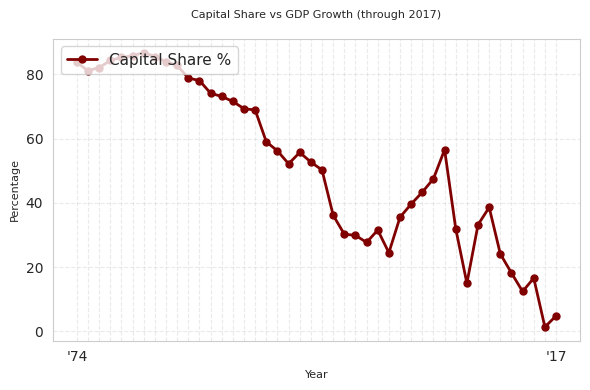

In [ ]:
plt.figure(figsize=(6, 4))

# Filter data up to 2017
plot_data = merged_data.loc[:2017]

# Create two-digit year labels (only showing first and last)
years = plot_data.index
xtick_labels = [f"'{years[0] % 100:02d}" if i == 0 else
               f"'{years[-1] % 100:02d}" if i == len(years)-1 else
               "" for i in range(len(years))]

# Plot Capital Share
plt.plot(plot_data.index, plot_data["Capital_Share"],
         color="maroon",
         linewidth=2,
         marker='o',
         markersize=5,
         label="Capital Share %")
# Formatting
plt.title("Capital Share vs GDP Growth (through 2017)", fontsize=8, pad=15)
plt.ylabel("Percentage", fontsize=8)
plt.xlabel("Year", fontsize=8)
plt.xticks(years, xtick_labels)  # Two-digit years (only first and last)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()
plt.show()

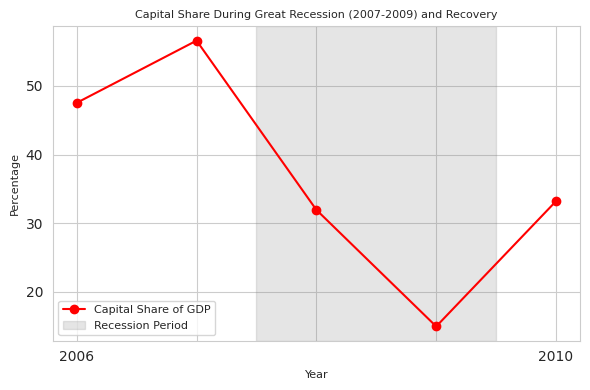

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming merged_data is a DataFrame with years as index and Capital_Share column
# This is the standalone version of your recession period graph

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Define recession period years
recession_period = range(2006, 2011)  # Years 2006 through 2010

# Plot the data for the recession period
ax.plot(merged_data.loc[recession_period].index,
        merged_data.loc[recession_period]["Capital_Share"],
        'r-o', label="Capital Share of GDP")

# Set title and labels
ax.set_title("Capital Share During Great Recession (2007-2009) and Recovery", fontsize=8)
ax.set_ylabel("Percentage", fontsize=8)
ax.set_xlabel("Year", fontsize=8)

# Highlight the recession period
ax.axvspan(2007.5, 2009.5, color='gray', alpha=0.2, label='Recession Period')

# Add a legend
ax.legend(fontsize=8)

# Customize x-axis ticks to show only first and last year
years = list(recession_period)
ax.set_xticks(years)
ax.set_xticklabels([str(year) if year == years[0] or year == years[-1] else '' for year in years])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# (f) Growth rate of output per capita

GDP Per Capita Statistics (1960-2023):
count      64.000000
mean      688.096319
std       708.272417
min        86.924610
25%       171.003151
50%       367.327076
75%      1061.241832
max      2567.021709
Name: GDP per Capita (USD), dtype: float64

Compound Annual Growth Rate (CAGR): 5.43%


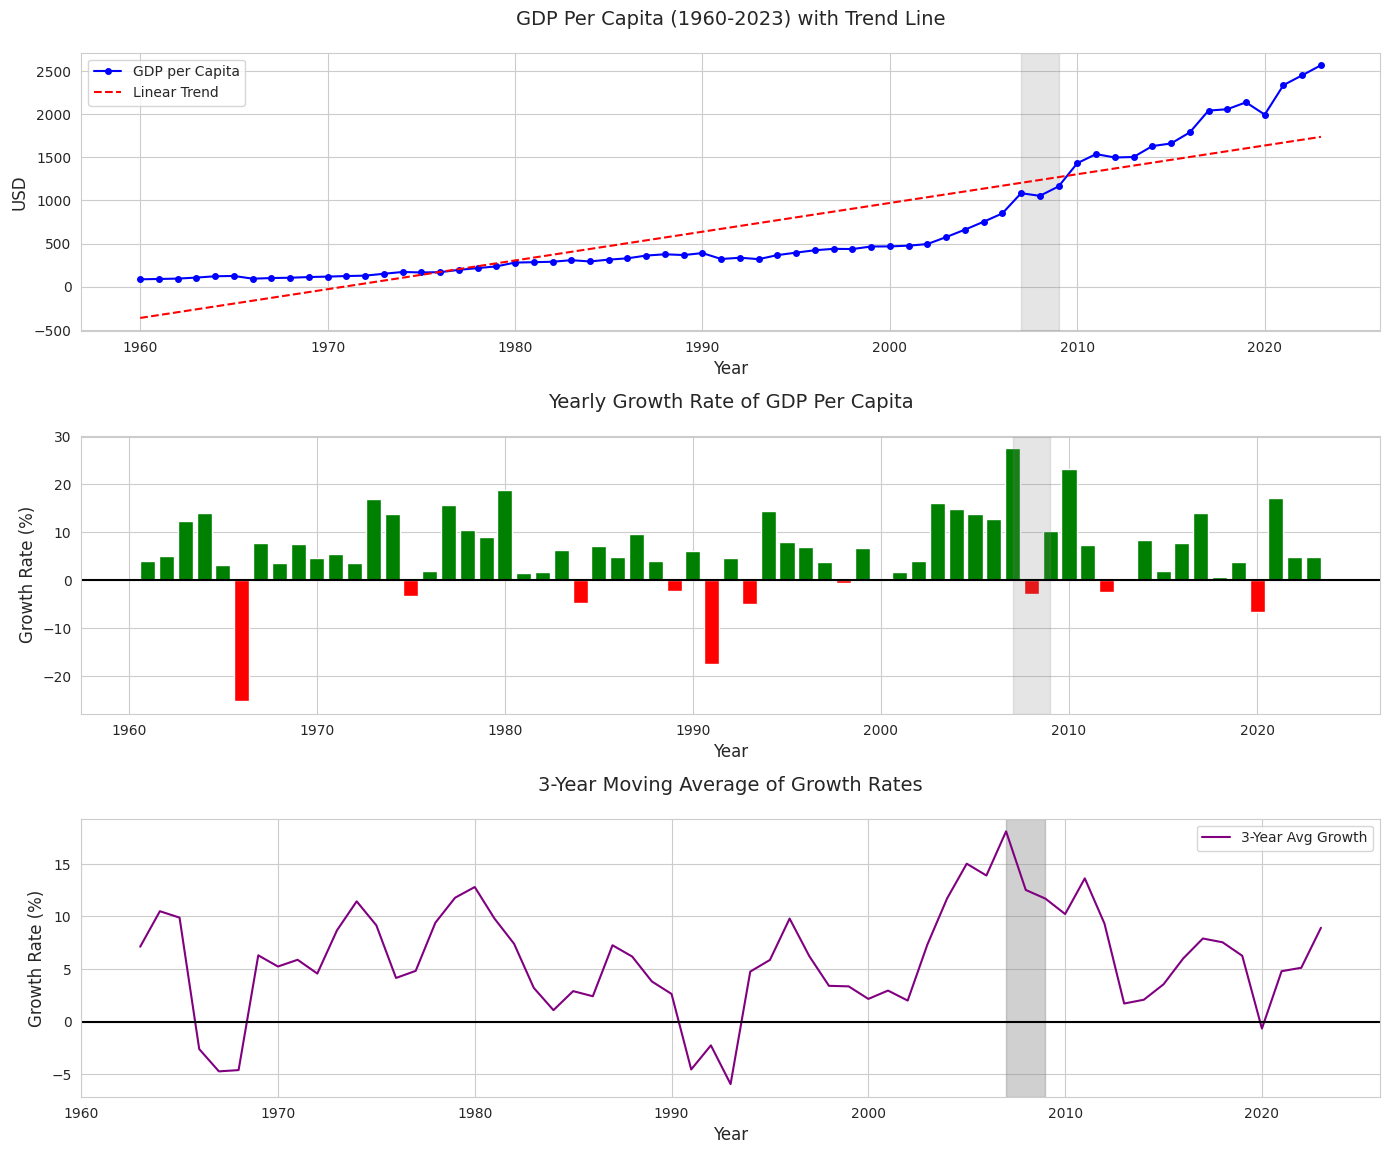


=== Period Analysis ===

Early Period (1960-1980):
  Start: 86.92 USD
  End: 280.62 USD
  CAGR: 6.03%
  Total Growth: 222.8%

Middle Period (1981-2000):
  Start: 284.97 USD
  End: 467.93 USD
  CAGR: 2.64%
  Total Growth: 64.2%

Recent Period (2001-2023):
  Start: 476.39 USD
  End: 2567.02 USD
  CAGR: 7.96%
  Total Growth: 438.9%

=== Great Recession Analysis ===
    Year  GDP per Capita (USD)  Growth_Rate
47  2007           1084.435329    27.558932
48  2008           1053.510667    -2.851683
49  2009           1162.814573    10.375206

=== Volatility Analysis ===
Standard deviation of growth rates (full period): 8.47%
Standard deviation of growth rates (pre-2000): 8.38%
Standard deviation of growth rates (post-2000): 8.48%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Load the data
df = pd.read_excel('/content/Output per Capita.xlsx')

# Calculate growth rates using the provided formula
df['Growth_Rate'] = ((df['GDP per Capita (USD)'] - df['GDP per Capita (USD)'].shift(1)) /
                     df['GDP per Capita (USD)'].shift(1)) * 100

# Calculate rolling averages
df['3Yr_Avg_Growth'] = df['Growth_Rate'].rolling(3).mean()
df['5Yr_Avg'] = df['GDP per Capita (USD)'].rolling(5).mean()

# Basic statistics
stats = df['GDP per Capita (USD)'].describe()
cagr = ((df['GDP per Capita (USD)'].iloc[-1] / df['GDP per Capita (USD)'].iloc[0]) ** (1/len(df)) - 1) * 100

print("GDP Per Capita Statistics (1960-2023):")
print(stats)
print(f"\nCompound Annual Growth Rate (CAGR): {cagr:.2f}%")

# Plotting
plt.figure(figsize=(14, 15))

# 1. Time series plot with trend line
ax1 = plt.subplot(4, 1, 1)
plt.plot(df['Year'], df['GDP per Capita (USD)'],
         marker='o', markersize=4, color='b', label='GDP per Capita')
plt.title('GDP Per Capita (1960-2023) with Trend Line', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('USD', fontsize=12)
plt.grid(True)

# Add linear trend line
z = np.polyfit(df['Year'], df['GDP per Capita (USD)'], 1)
p = np.poly1d(z)
plt.plot(df['Year'], p(df['Year']), "r--", label='Linear Trend')

# Highlight Great Recession
recession = plt.axvspan(2007, 2009, color='gray', alpha=0.2)
plt.legend()

# 2. Growth rate plot
ax2 = plt.subplot(4, 1, 2)
plt.bar(df['Year'], df['Growth_Rate'],
        color=np.where(df['Growth_Rate'] > 0, 'g', 'r'))
plt.title('Yearly Growth Rate of GDP Per Capita', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.axhline(y=0, color='black', linestyle='-')
plt.grid(True)

# Highlight Great Recession
plt.axvspan(2007, 2009, color='gray', alpha=0.2)

# 3. Rolling average growth rate
ax3 = plt.subplot(4, 1, 3)
plt.plot(df['Year'], df['3Yr_Avg_Growth'], color='purple', label='3-Year Avg Growth')
plt.title('3-Year Moving Average of Growth Rates', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.axhline(y=0, color='black', linestyle='-')
plt.grid(True)
plt.legend()

# Highlight Great Recession
plt.axvspan(2007, 2009, color='gray', alpha=0.2)

# Highlight Great Recession
plt.axvspan(2007, 2009, color='gray', alpha=0.2)

plt.tight_layout()
plt.show()

# Period analysis
print("\n=== Period Analysis ===")
periods = {
    'Early Period (1960-1980)': (1960, 1980),
    'Middle Period (1981-2000)': (1981, 2000),
    'Recent Period (2001-2023)': (2001, 2023)
}

for name, (start, end) in periods.items():
    mask = (df['Year'] >= start) & (df['Year'] <= end)
    period_data = df.loc[mask, 'GDP per Capita (USD)']
    period_growth = (period_data.iloc[-1] / period_data.iloc[0]) ** (1/(end-start)) - 1
    print(f"\n{name}:")
    print(f"  Start: {period_data.iloc[0]:.2f} USD")
    print(f"  End: {period_data.iloc[-1]:.2f} USD")
    print(f"  CAGR: {period_growth*100:.2f}%")
    print(f"  Total Growth: {(period_data.iloc[-1]/period_data.iloc[0]-1)*100:.1f}%")

# Great Recession analysis
print("\n=== Great Recession Analysis ===")
recession_years = df[(df['Year'] >= 2007) & (df['Year'] <= 2009)]
print(recession_years[['Year', 'GDP per Capita (USD)', 'Growth_Rate']])

# Volatility analysis
print("\n=== Volatility Analysis ===")
full_std = df['Growth_Rate'].std()
pre_2000_std = df[df['Year'] < 2000]['Growth_Rate'].std()
post_2000_std = df[df['Year'] >= 2000]['Growth_Rate'].std()
print(f"Standard deviation of growth rates (full period): {full_std:.2f}%")
print(f"Standard deviation of growth rates (pre-2000): {pre_2000_std:.2f}%")
print(f"Standard deviation of growth rates (post-2000): {post_2000_std:.2f}%")

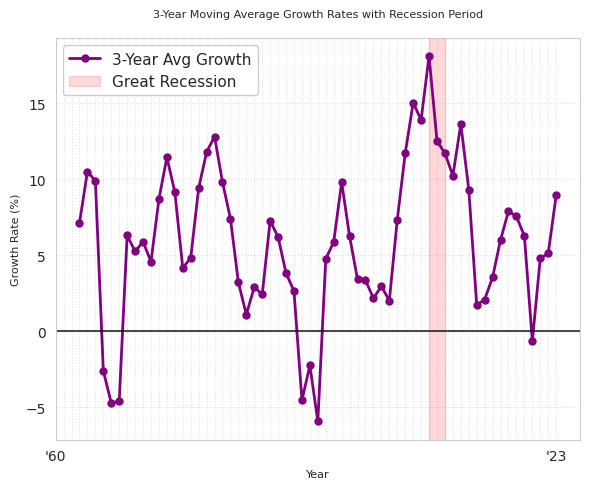

In [ ]:
plt.figure(figsize=(6, 5))

# Create two-digit year labels (only showing first and last)
years = df['Year']
xtick_labels = [f"'{int(year) % 100:02d}" if i == 0 or i == len(years)-1 else ""
               for i, year in enumerate(years)]

# Plot 3-year moving average
plt.plot(df['Year'], df['3Yr_Avg_Growth'],
         color='purple',
         linewidth=2,
         marker='o',
         markersize=5,
         label='3-Year Avg Growth')

# Zero line reference
plt.axhline(y=0, color='black', linestyle='-', alpha=0.7)

# Highlight recession period (2007-2009)
plt.axvspan(2007, 2009, color='red', alpha=0.15, label='Great Recession')

# Formatting
plt.title('3-Year Moving Average Growth Rates with Recession Period', fontsize=8, pad=15)
plt.xlabel('Year', fontsize=8)
plt.ylabel('Growth Rate (%)', fontsize=8)
plt.xticks(df['Year'], xtick_labels)  # Two-digit years (only first and last)
plt.grid(True, linestyle=':', alpha=0.6)

plt.legend(fontsize=11, loc='upper left', framealpha=1)
plt.tight_layout()
plt.show()

# (g) Growth rate of consumption per capita

Consumption Per Capita Statistics (1960-2023):
count      64.000000
mean      498.784557
std       485.974890
min        81.672116
25%       152.345773
50%       293.579436
75%       708.998981
max      1824.753277
Name: Consumption per Capita, dtype: float64

Compound Annual Growth Rate (CAGR): 4.97%


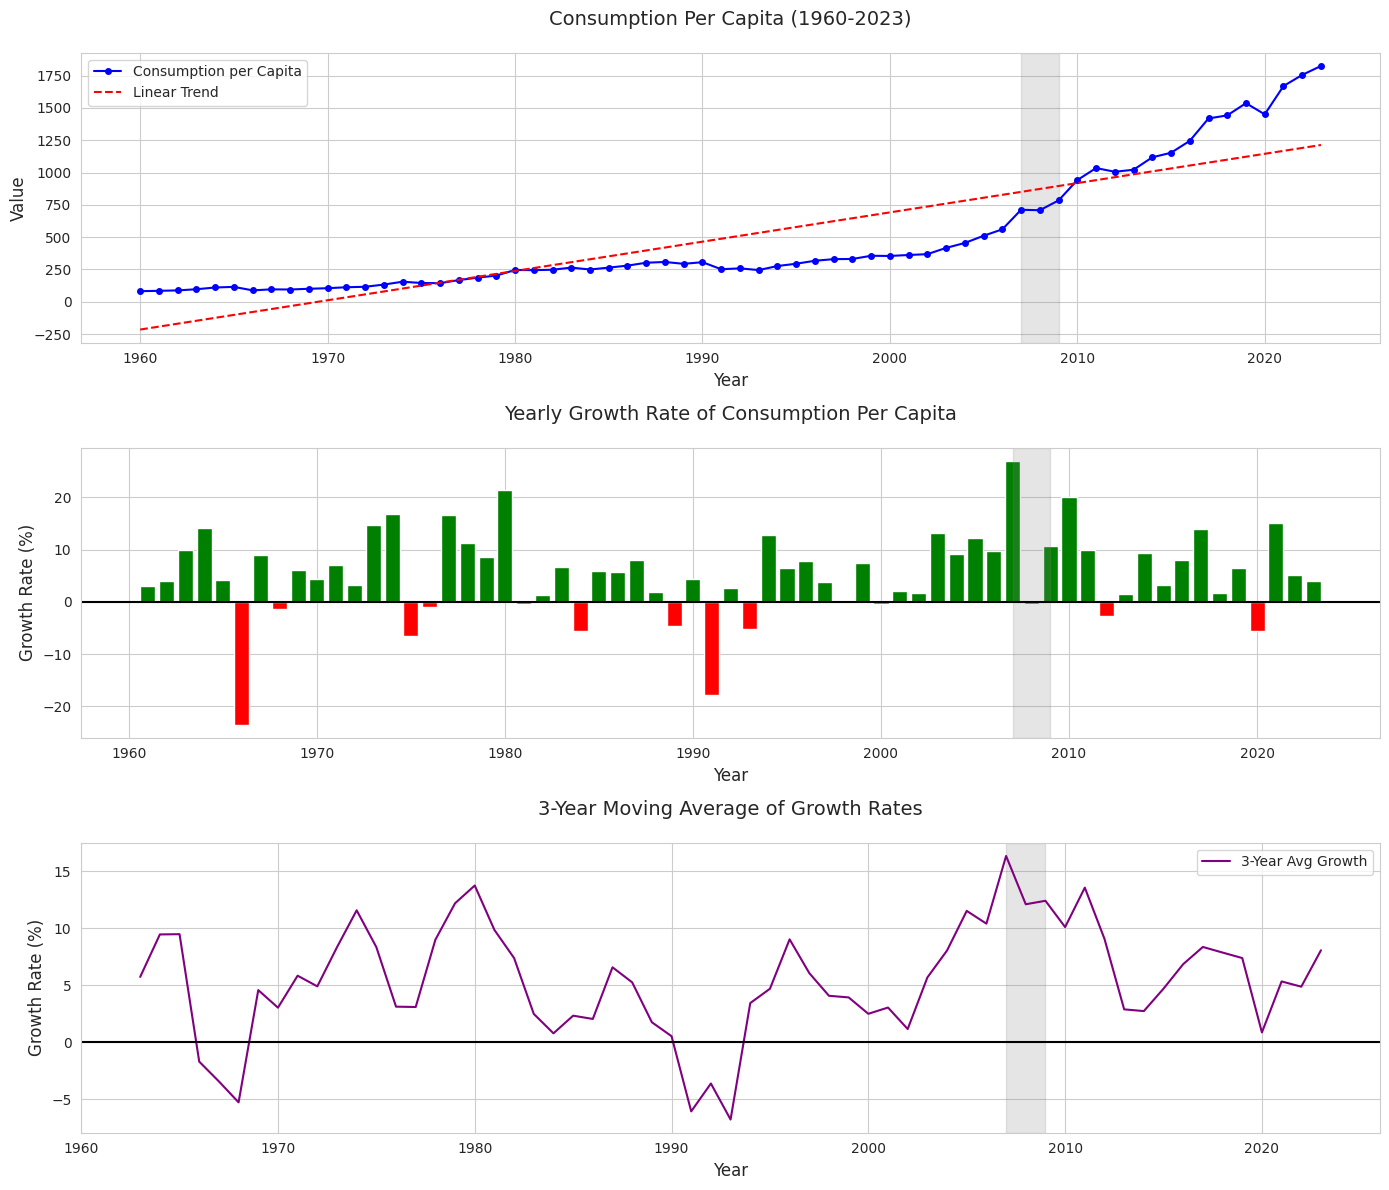


=== Period Analysis ===

Early Period (1960-1980):
  Start: 81.67
  End: 245.53
  CAGR: 5.66%
  Total Growth: 200.6%

Middle Period (1981-2000):
  Start: 244.41
  End: 354.16
  CAGR: 1.97%
  Total Growth: 44.9%

Recent Period (2001-2023):
  Start: 361.62
  End: 1824.75
  CAGR: 7.63%
  Total Growth: 404.6%

=== Great Recession Analysis ===
    Year  Consumption per Capita  Growth_Rate
47  2007              711.634949    26.998109
48  2008              708.120325    -0.493880
49  2009              783.964421    10.710623


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Load the data
df = pd.read_excel('/content/Consumption per capita.xlsx')

# Calculate growth rates
df['Growth_Rate'] = df['Consumption per Capita'].pct_change() * 100
df['3Yr_Avg_Growth'] = df['Growth_Rate'].rolling(3).mean()

# Basic statistics
stats = df['Consumption per Capita'].describe()
cagr = ((df['Consumption per Capita'].iloc[-1] / df['Consumption per Capita'].iloc[0]) ** (1/len(df)) - 1) * 100

print("Consumption Per Capita Statistics (1960-2023):")
print(stats)
print(f"\nCompound Annual Growth Rate (CAGR): {cagr:.2f}%")

# Plotting
plt.figure(figsize=(14, 12))

# Time series plot
ax1 = plt.subplot(3, 1, 1)
plt.plot(df['Year'], df['Consumption per Capita'],
         marker='o', markersize=4, color='b', label='Consumption per Capita')
plt.title('Consumption Per Capita (1960-2023)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.grid(True)

# Add trend line
z = np.polyfit(df['Year'], df['Consumption per Capita'], 1)
p = np.poly1d(z)
plt.plot(df['Year'], p(df['Year']), "r--", label='Linear Trend')

# Highlight Great Recession
recession = plt.axvspan(2007, 2009, color='gray', alpha=0.2)
plt.legend()

# Growth rate plot
ax2 = plt.subplot(3, 1, 2)
plt.bar(df['Year'], df['Growth_Rate'],
        color=np.where(df['Growth_Rate'] > 0, 'g', 'r'))
plt.title('Yearly Growth Rate of Consumption Per Capita', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.axhline(y=0, color='black', linestyle='-')
plt.grid(True)

# Highlight Great Recession
plt.axvspan(2007, 2009, color='gray', alpha=0.2)

# Rolling average growth rate
ax3 = plt.subplot(3, 1, 3)
plt.plot(df['Year'], df['3Yr_Avg_Growth'], color='purple', label='3-Year Avg Growth')
plt.title('3-Year Moving Average of Growth Rates', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.axhline(y=0, color='black', linestyle='-')
plt.grid(True)
plt.legend()

# Highlight Great Recession
plt.axvspan(2007, 2009, color='gray', alpha=0.2)

plt.tight_layout()
plt.show()

# Period analysis
print("\n=== Period Analysis ===")
periods = {
    'Early Period (1960-1980)': (1960, 1980),
    'Middle Period (1981-2000)': (1981, 2000),
    'Recent Period (2001-2023)': (2001, 2023)
}

for name, (start, end) in periods.items():
    mask = (df['Year'] >= start) & (df['Year'] <= end)
    period_data = df.loc[mask, 'Consumption per Capita']
    period_growth = (period_data.iloc[-1] / period_data.iloc[0]) ** (1/(end-start)) - 1
    print(f"\n{name}:")
    print(f"  Start: {period_data.iloc[0]:.2f}")
    print(f"  End: {period_data.iloc[-1]:.2f}")
    print(f"  CAGR: {period_growth*100:.2f}%")
    print(f"  Total Growth: {(period_data.iloc[-1]/period_data.iloc[0]-1)*100:.1f}%")

# Great Recession analysis
print("\n=== Great Recession Analysis ===")
recession_years = df[(df['Year'] >= 2007) & (df['Year'] <= 2009)]
print(recession_years[['Year', 'Consumption per Capita', 'Growth_Rate']])

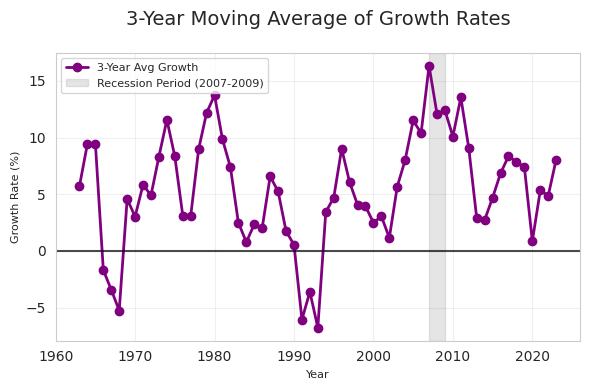

In [ ]:
import matplotlib.pyplot as plt

# Create a standalone figure for the rolling average growth rate
plt.figure(figsize=(6, 4))

# Plot the 3-year average growth rate
plt.plot(df['Year'], df['3Yr_Avg_Growth'], color='purple', marker='o',
         linewidth=2, label='3-Year Avg Growth')

# Set title and labels
plt.title('3-Year Moving Average of Growth Rates', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=8)
plt.ylabel('Growth Rate (%)', fontsize=8)

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-', alpha=0.7)

# Highlight the recession period (2007-2009)
plt.axvspan(2007, 2009, color='gray', alpha=0.2, label='Recession Period (2007-2009)')

# Add grid and legend
plt.grid(True, alpha=0.3)
plt.legend(fontsize=8)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# (h) Civilian unemployment rate

Unemployment Rate Statistics (1991-2023):
count    33.000000
mean      7.560303
std       1.025075
min       4.170000
25%       6.990000
50%       7.860000
75%       8.250000
max       8.700000
Name: Unemployment Rate (%), dtype: float64


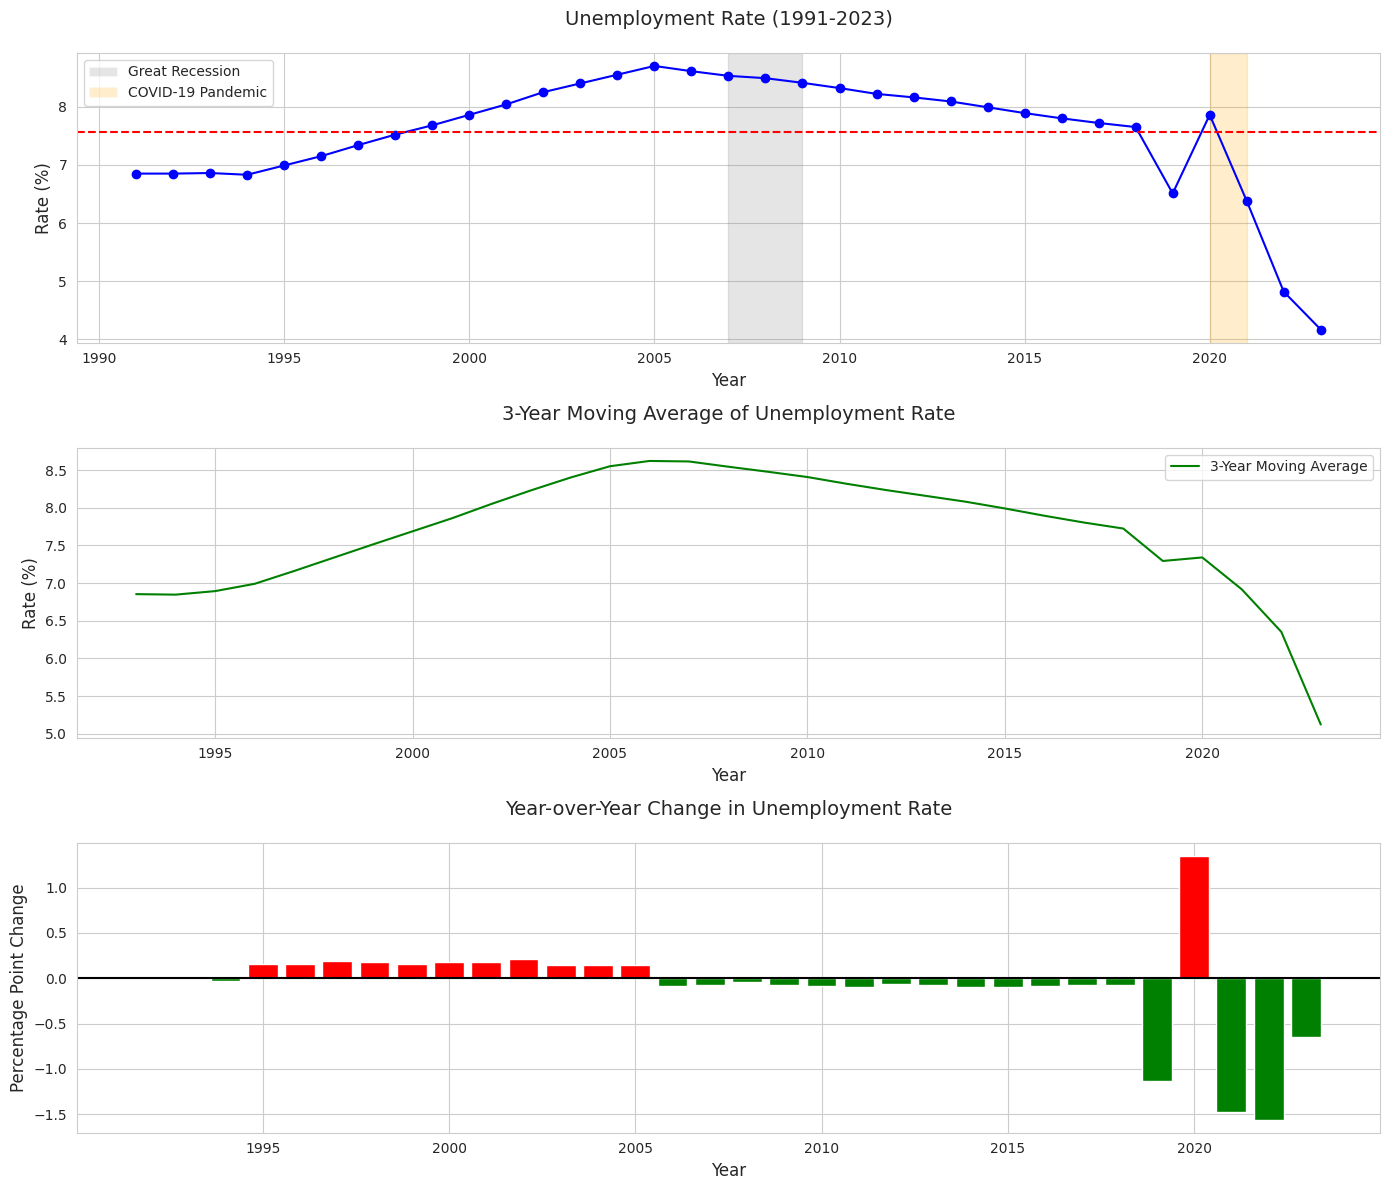


=== Period Analysis ===

Pre-Great Recession (1991-2006):
  Average: 7.66%
  Range: 6.83% to 8.70%
  Years: 16 years

Great Recession (2007-2009):
  Average: 8.48%
  Range: 8.41% to 8.53%
  Years: 3 years

Post-Recession Recovery (2010-2019):
  Average: 7.84%
  Range: 6.51% to 8.32%
  Years: 10 years

Pandemic & Recent (2020-2023):
  Average: 5.81%
  Range: 4.17% to 7.86%
  Years: 4 years

=== Structural Break Analysis ===
Pre-2019 average: 7.80%
Post-2019 average: 5.81%
Difference: 1.99 percentage points (25.6% lower)

=== Volatility Analysis ===
Standard deviation (full period): 1.03%
Standard deviation (pre-2019): 0.64%
Standard deviation (post-2019): 1.65%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Load data from Excel file
file_path = '/content/Unemployment_Rates_1991_to_2023 (1).xlsx'
df = pd.read_excel(file_path)

# Basic statistics
stats = df['Unemployment Rate (%)'].describe()
print("Unemployment Rate Statistics (1991-2023):")
print(stats)

# Plotting
plt.figure(figsize=(14, 12))

# Time series plot
ax1 = plt.subplot(3, 1, 1)
plt.plot(df['Year'], df['Unemployment Rate (%)'],
         marker='o', color='b', label='Annual Rate')
plt.axhline(y=df['Unemployment Rate (%)'].mean(),
            color='r', linestyle='--',
            label=f'Mean ({df["Unemployment Rate (%)"].mean():.2f}%)')
plt.title('Unemployment Rate (1991-2023)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate (%)', fontsize=12)
plt.legend()
plt.grid(True)

# Highlight economic events
recession = plt.axvspan(2007, 2009, color='gray', alpha=0.2)
pandemic = plt.axvspan(2020, 2021, color='orange', alpha=0.2)

# Create custom legend for events
event_legend = [Patch(facecolor='gray', alpha=0.2, label='Great Recession'),
                Patch(facecolor='orange', alpha=0.2, label='COVID-19 Pandemic')]
plt.legend(handles=event_legend, loc='upper left')

# Rolling average (3-year)
plt.subplot(3, 1, 2)
df['3Yr_Avg'] = df['Unemployment Rate (%)'].rolling(3).mean()
plt.plot(df['Year'], df['3Yr_Avg'], color='g', label='3-Year Moving Average')
plt.title('3-Year Moving Average of Unemployment Rate', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate (%)', fontsize=12)
plt.legend()
plt.grid(True)

# Year-over-Year Change
plt.subplot(3, 1, 3)
df['YoY_Change'] = df['Unemployment Rate (%)'].diff()
colors = np.where(df['YoY_Change'] > 0, 'r', 'g')
plt.bar(df['Year'], df['YoY_Change'], color=colors)
plt.title('Year-over-Year Change in Unemployment Rate', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Point Change', fontsize=12)
plt.axhline(y=0, color='black', linestyle='-')
plt.grid(True)

plt.tight_layout()
plt.show()

# Period analysis
print("\n=== Period Analysis ===")
periods = {
    'Pre-Great Recession (1991-2006)': (1991, 2006),
    'Great Recession (2007-2009)': (2007, 2009),
    'Post-Recession Recovery (2010-2019)': (2010, 2019),
    'Pandemic & Recent (2020-2023)': (2020, 2023)
}

for name, (start, end) in periods.items():
    mask = (df['Year'] >= start) & (df['Year'] <= end)
    period_mean = df.loc[mask, 'Unemployment Rate (%)'].mean()
    period_min = df.loc[mask, 'Unemployment Rate (%)'].min()
    period_max = df.loc[mask, 'Unemployment Rate (%)'].max()
    print(f"\n{name}:")
    print(f"  Average: {period_mean:.2f}%")
    print(f"  Range: {period_min:.2f}% to {period_max:.2f}%")
    print(f"  Years: {end - start + 1} years")

# Structural break analysis
print("\n=== Structural Break Analysis ===")
pre_2019 = df[df['Year'] <= 2019]['Unemployment Rate (%)']
post_2019 = df[df['Year'] > 2019]['Unemployment Rate (%)']
mean_diff = pre_2019.mean() - post_2019.mean()
pct_diff = (mean_diff / pre_2019.mean()) * 100

print(f"Pre-2019 average: {pre_2019.mean():.2f}%")
print(f"Post-2019 average: {post_2019.mean():.2f}%")
print(f"Difference: {mean_diff:.2f} percentage points ({pct_diff:.1f}% lower)")

# Volatility analysis
print("\n=== Volatility Analysis ===")
print(f"Standard deviation (full period): {df['Unemployment Rate (%)'].std():.2f}%")
print(f"Standard deviation (pre-2019): {pre_2019.std():.2f}%")
print(f"Standard deviation (post-2019): {post_2019.std():.2f}%")

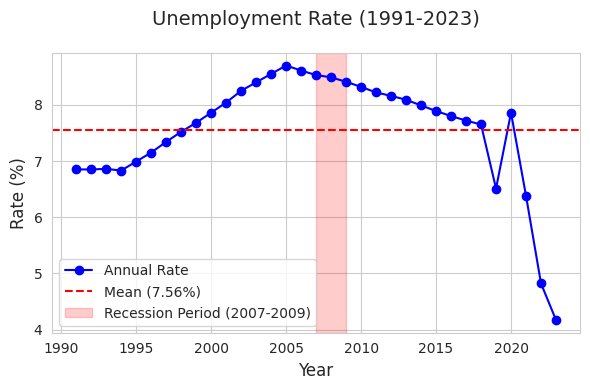

In [ ]:
# Create unemployment rate plot
plt.figure(figsize=(6, 4))

plt.plot(df['Year'], df['Unemployment Rate (%)'],
         marker='o', color='b', label='Annual Rate')
plt.axhline(y=df['Unemployment Rate (%)'].mean(),
            color='r', linestyle='--',
            label=f'Mean ({df["Unemployment Rate (%)"].mean():.2f}%)')

# Highlight recession period in red
plt.axvspan(2007, 2009, color='red', alpha=0.2, label='Recession Period (2007-2009)')

plt.title('Unemployment Rate (1991-2023)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate (%)', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# (i) Average duration of unemployment
# (Alternate Findings: Employment to Population Ratio)

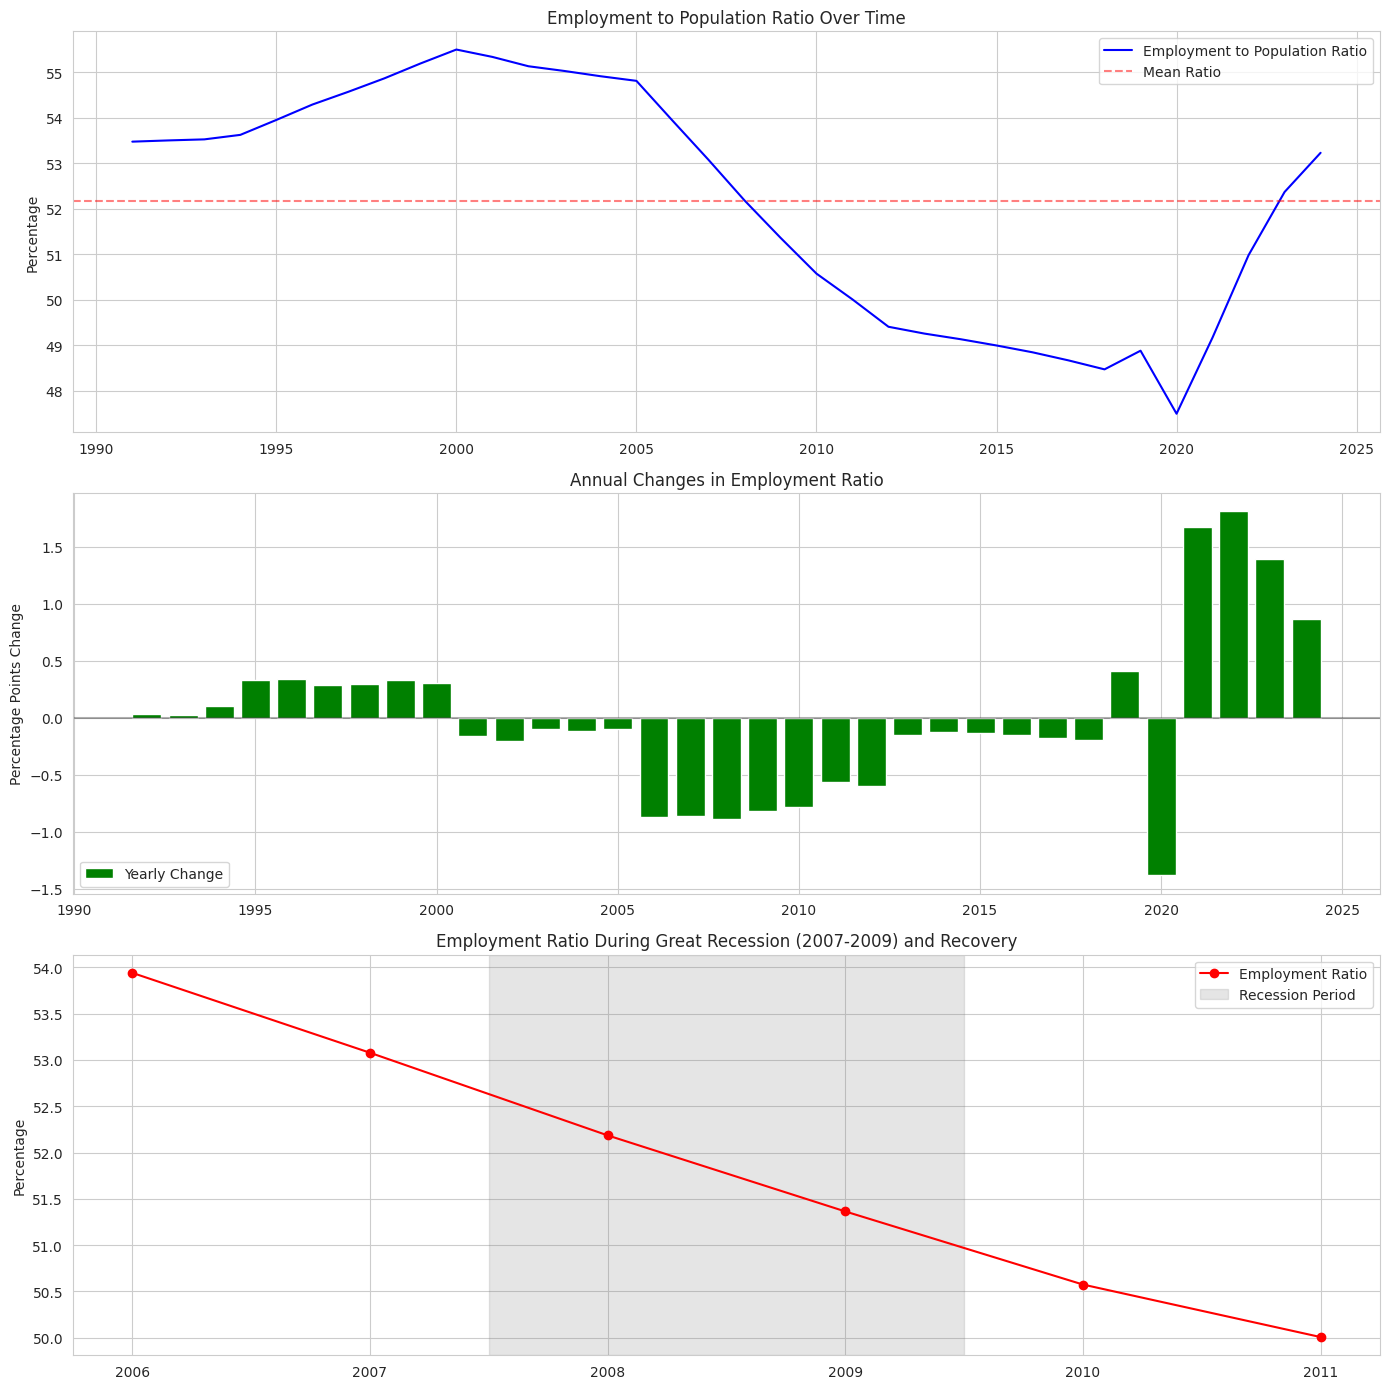

DESCRIPTIVE STATISTICS
       Employment_Ratio
count         34.000000
mean          52.169765
std            2.571861
min           47.496000
25%           49.294500
50%           53.153500
75%           54.500750
max           55.499000

GREAT RECESSION PERIOD (2007-2009)
      Employment_Ratio
Year                  
2007            53.077
2008            52.185
2009            51.364

EMPLOYMENT RATIO ANALYSIS
Average ratio: 52.1698%
Minimum ratio: 47.4960% in 2020
Maximum ratio: 55.4990% in 2000
Ratio at start of Great Recession (2007): 53.0770%
Ratio at end of Great Recession (2009): 51.3640%
Total decline during recession: 1.7130 percentage points

Volatility (std dev of yearly changes): 0.7063 percentage points

COVID PERIOD ANALYSIS (2019-2021)
      Employment_Ratio  Yearly_Change  Pct_Change
Year                                             
2019            48.881          0.410    0.845867
2020            47.496         -1.385   -2.833412
2021            49.171          1.675

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Load the data
emp_data = pd.read_excel("/content/Employment to Population ratio.xlsx")

# Clean and prepare the data
emp_data.columns = ["Year", "Employment_Ratio"]
emp_data = emp_data.set_index("Year")

# Descriptive statistics
desc_stats = emp_data.describe()

# Time series decomposition
decomposition = seasonal_decompose(emp_data["Employment_Ratio"], model='additive', period=1)

# Great Recession period analysis
recession_years = [2007, 2008, 2009]
recession_data = emp_data.loc[recession_years]

# Calculate year-to-year changes
emp_data["Yearly_Change"] = emp_data["Employment_Ratio"].diff()
emp_data["Pct_Change"] = emp_data["Employment_Ratio"].pct_change() * 100

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(14, 14))

# 1. Employment ratio trend
axes[0].plot(emp_data.index, emp_data["Employment_Ratio"], label="Employment to Population Ratio", color="blue")
axes[0].set_title("Employment to Population Ratio Over Time")
axes[0].set_ylabel("Percentage")
axes[0].axhline(y=emp_data["Employment_Ratio"].mean(), color='red', linestyle='--', alpha=0.5, label='Mean Ratio')
axes[0].legend()

# 2. Yearly changes
axes[1].bar(emp_data.index, emp_data["Yearly_Change"], label="Yearly Change", color="green")
axes[1].set_title("Annual Changes in Employment Ratio")
axes[1].set_ylabel("Percentage Points Change")
axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1].legend()

# 3. Recession period zoom
recession_period = range(2006, 2012)  # Showing a few years before and after for context
axes[2].plot(emp_data.loc[recession_period].index,
             emp_data.loc[recession_period]["Employment_Ratio"],
             'r-o', label="Employment Ratio")
axes[2].set_title("Employment Ratio During Great Recession (2007-2009) and Recovery")
axes[2].set_ylabel("Percentage")
axes[2].axvspan(2007.5, 2009.5, color='gray', alpha=0.2, label='Recession Period')
axes[2].legend()

plt.tight_layout()
plt.show()

# Print key statistics
print("="*50)
print("DESCRIPTIVE STATISTICS")
print("="*50)
print(desc_stats)

print("\n" + "="*50)
print("GREAT RECESSION PERIOD (2007-2009)")
print("="*50)
print(recession_data)

print("\n" + "="*50)
print("EMPLOYMENT RATIO ANALYSIS")
print("="*50)
print(f"Average ratio: {emp_data['Employment_Ratio'].mean():.4f}%")
print(f"Minimum ratio: {emp_data['Employment_Ratio'].min():.4f}% in {emp_data['Employment_Ratio'].idxmin()}")
print(f"Maximum ratio: {emp_data['Employment_Ratio'].max():.4f}% in {emp_data['Employment_Ratio'].idxmax()}")
print(f"Ratio at start of Great Recession (2007): {emp_data.loc[2007]['Employment_Ratio']:.4f}%")
print(f"Ratio at end of Great Recession (2009): {emp_data.loc[2009]['Employment_Ratio']:.4f}%")
print(f"Total decline during recession: {emp_data.loc[2007]['Employment_Ratio'] - emp_data.loc[2009]['Employment_Ratio']:.4f} percentage points")

# Calculate volatility (standard deviation of yearly changes)
volatility = emp_data["Yearly_Change"].std()
print(f"\nVolatility (std dev of yearly changes): {volatility:.4f} percentage points")

# COVID period analysis (if data includes those years)
if 2020 in emp_data.index:
    covid_data = emp_data.loc[2019:2021]
    print("\n" + "="*50)
    print("COVID PERIOD ANALYSIS (2019-2021)")
    print("="*50)
    print(covid_data)

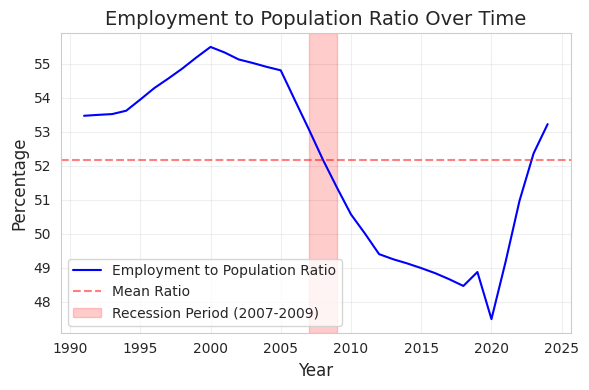

In [ ]:
# Create standalone figure for Employment to Population Ratio
plt.figure(figsize=(6, 4))

# Plot the employment ratio
plt.plot(emp_data.index, emp_data["Employment_Ratio"],
         label="Employment to Population Ratio", color="blue")

# Add mean line
plt.axhline(y=emp_data["Employment_Ratio"].mean(),
            color='red', linestyle='--', alpha=0.5,
            label='Mean Ratio')

# Highlight recession period in red
plt.axvspan(2007, 2009, color='red', alpha=0.2,
            label='Recession Period (2007-2009)')

# Add title and labels
plt.title("Employment to Population Ratio Over Time", fontsize=14)
plt.ylabel("Percentage", fontsize=12)
plt.xlabel("Year", fontsize=12)

# Add legend and grid
plt.legend()
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# (j) Inflation

Inflation Statistics (1960-2023):
count    64.000000
mean      7.338906
std       4.835031
min      -7.630000
25%       4.190000
50%       6.645000
75%       9.615000
max      28.600000
Name: Inflation, dtype: float64


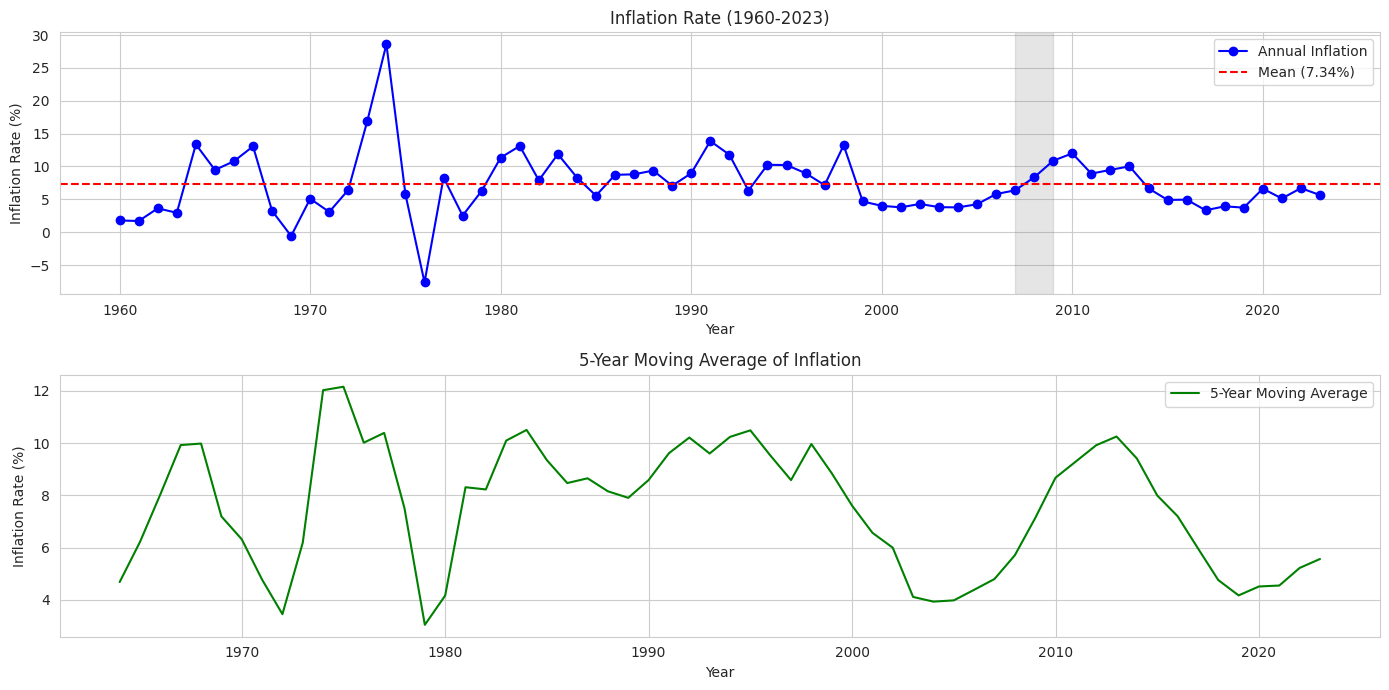


Decade Averages:
   Decade  Inflation
0    1960      5.941
1    1970      7.538
2    1980      9.208
3    1990      9.547
4    2000      5.532
5    2010      6.793
6    2020      6.025


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = {
    'Year': [1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
             1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
             1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
             1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
             2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
             2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
             2020, 2021, 2022, 2023],
    'Inflation': [1.78, 1.70, 3.63, 2.95, 13.36, 9.47, 10.80, 13.06, 3.24, -0.58,
                  5.09, 3.08, 6.44, 16.94, 28.60, 5.75, -7.63, 8.31, 2.52, 6.28,
                  11.35, 13.11, 7.89, 11.87, 8.32, 5.56, 8.73, 8.80, 9.38, 7.07,
                  8.97, 13.87, 11.79, 6.33, 10.25, 10.22, 8.98, 7.16, 13.23, 4.67,
                  4.01, 3.78, 4.30, 3.81, 3.77, 4.25, 5.80, 6.37, 8.35, 10.88,
                  11.99, 8.91, 9.48, 10.02, 6.67, 4.91, 4.95, 3.33, 3.94, 3.73,
                  6.62, 5.13, 6.70, 5.65]
}

df = pd.DataFrame(data)

# Basic statistics
stats = df['Inflation'].describe()
print("Inflation Statistics (1960-2023):")
print(stats)

# Plotting
plt.figure(figsize=(14, 7))

# Time series plot
plt.subplot(2, 1, 1)
plt.plot(df['Year'], df['Inflation'], marker='o', color='b', label='Annual Inflation')
plt.axhline(y=df['Inflation'].mean(), color='r', linestyle='--', label=f'Mean ({df["Inflation"].mean():.2f}%)')
plt.title('Inflation Rate (1960-2023)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.grid(True)

# Highlight Great Recession period (2007-2009)
plt.axvspan(2007, 2009, color='gray', alpha=0.2, label='Great Recession')

# Rolling average (5-year)
plt.subplot(2, 1, 2)
df['5Yr_Avg'] = df['Inflation'].rolling(5).mean()
plt.plot(df['Year'], df['5Yr_Avg'], color='g', label='5-Year Moving Average')
plt.title('5-Year Moving Average of Inflation')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Additional analysis: Decade averages
df['Decade'] = (df['Year'] // 10) * 10
decade_avg = df.groupby('Decade')['Inflation'].mean().reset_index()
print("\nDecade Averages:")
print(decade_avg)

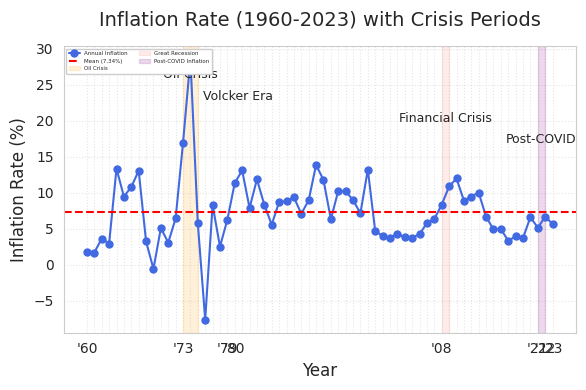

In [ ]:
plt.figure(figsize=(6, 4))

# Create selective year labels (first, last, and key recession years)
years = df['Year']
xtick_labels = []
for i, year in enumerate(years):
    if i == 0 or i == len(years)-1 or year in [1973, 1979, 1980, 2008, 2021, 2022]:
        xtick_labels.append(f"'{year % 100:02d}")
    else:
        xtick_labels.append("")

# Calculate mean inflation
mean_inflation = df['Inflation'].mean()

# Plot inflation rate
plt.plot(df['Year'], df['Inflation'],
         marker='o',
         color='royalblue',
         linewidth=1.5,
         markersize=5,
         label='Annual Inflation')

# Mean reference line
plt.axhline(y=mean_inflation,
            color='red',
            linestyle='--',
            linewidth=1.5,
            label=f'Mean ({mean_inflation:.2f}%)')

# Highlight major economic crises
plt.axvspan(1973, 1975, color='orange', alpha=0.15, label='Oil Crisis')
plt.axvspan(2008, 2009, color='salmon', alpha=0.15, label='Great Recession')
plt.axvspan(2021, 2022, color='purple', alpha=0.15, label='Post-COVID Inflation')

# Formatting
plt.title('Inflation Rate (1960-2023) with Crisis Periods', fontsize=14, pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Inflation Rate (%)', fontsize=12)
plt.xticks(df['Year'], xtick_labels)
plt.grid(True, linestyle=':', alpha=0.5)

# Annotate key inflationary periods
plt.text(1974, plt.ylim()[1]*0.9, 'Oil Crisis',
         ha='center', va='top', fontsize=9)
plt.text(1980.5, plt.ylim()[1]*0.8, 'Volcker Era',
         ha='center', va='top', fontsize=9)
plt.text(2008.5, plt.ylim()[1]*0.7, 'Financial Crisis',
         ha='center', va='top', fontsize=9)
plt.text(2021.5, plt.ylim()[1]*0.6, 'Post-COVID',
         ha='center', va='top', fontsize=9)

plt.legend(fontsize=4, loc='upper left', ncol=2, framealpha=1)
plt.tight_layout()
plt.show()